# European Weightlifting Championships (EWC) 2025 - Karlos Nasar 188kg Snatch & 229 Clean and Jerk WR Analysis

Once upon a time, before the era of China's domination over Weightlifting, Bulgaria was the most ruthless winner in the world. Athletes were subject to insane training protocols with coach Ivan Abadzhiev in the 80s. Bulgaria then lost its empire due to several doping scandals from the time, which ultimately led to opening up the space for Chinese Weightlifting to rise to people's grace. In present day, we are experiencing a major shift again. Karlos Nasar is a Bulgarian athlete who won the last olympics in the -89kg category and proceeded to dominate the -96kg category in the EWC 2025. He has been on an upward trajectory for years now, even scaring the Chinese team out of sending athletes to the -89kg category in the olympics, because Nasar is that unbeatable. Nasar's numbers in the 89kg category can compete with athlete's results even at the -102kg category. Truly a once in a lifetime athlete. The present work will analyse Karlos' performance on the most recent EWC at the -96kg category, showing how he won with ease, and could have probably won in the category above too.

TODO:
- compare his numbers to the -102s and -109s as well
- bring more exogenous references
- hypothesis tests

In [197]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, mannwhitneyu, probplot, normaltest, norm, shapiro, pearsonr
from chart_helpers import *

DATA_PATH = "./data/"

ALPHA = 0.05

plt.rcParams["figure.dpi"] = 300
plt.rcParams["boxplot.medianprops.color"] = "black"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
snatch = pd.read_csv(DATA_PATH + "snatch_men_96.csv")
cj = pd.read_csv(DATA_PATH + "cj_men_96.csv")
total = pd.read_csv(DATA_PATH + "results_men_96.csv")
robi = pd.read_csv(DATA_PATH + "men_robi_points.csv")
total_102 = pd.read_csv(DATA_PATH + "results_men_102.csv")
total_109 = pd.read_csv(DATA_PATH + "results_men_109.csv")

## Bodyweight and Snatch

In [199]:
snatch.head()

,Standing,Name,Born,Nation,Session,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,174,180,188,188
1,2,DAVITADZE Revaz,16.10.1998,GEO,A,94.75,167,171,174,174
2,3,HOVHANNISYAN Davit,14.01.1997,ARM,A,95.85,165,170,173,173
3,4,GOBEJISHVILI Irakli,10.10.2000,GEO,A,95.10,161,161,166,166
4,5,KLIMONOV Egor,24.08.1992,AIN,A,96.00,160,164,166,164


In [200]:
snatch.describe()

,Standing,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,9.000000,95.202632,148.263158,151.894737,154.578947,143.263158
std,5.627314,1.020957,15.343627,15.527376,16.255993,38.818441
min,0.000000,92.600000,125.000000,125.000000,125.000000,0.000000
25%,4.500000,94.950000,135.000000,140.000000,142.000000,135.000000
50%,9.000000,95.650000,146.000000,149.000000,151.000000,148.000000
75%,13.500000,96.000000,162.000000,165.500000,167.000000,163.500000
max,18.000000,96.000000,174.000000,180.000000,188.000000,188.000000


([<matplotlib.axis.XTick at 0x1432ca020>], [Text(1, 0, 'Bodyweight')])

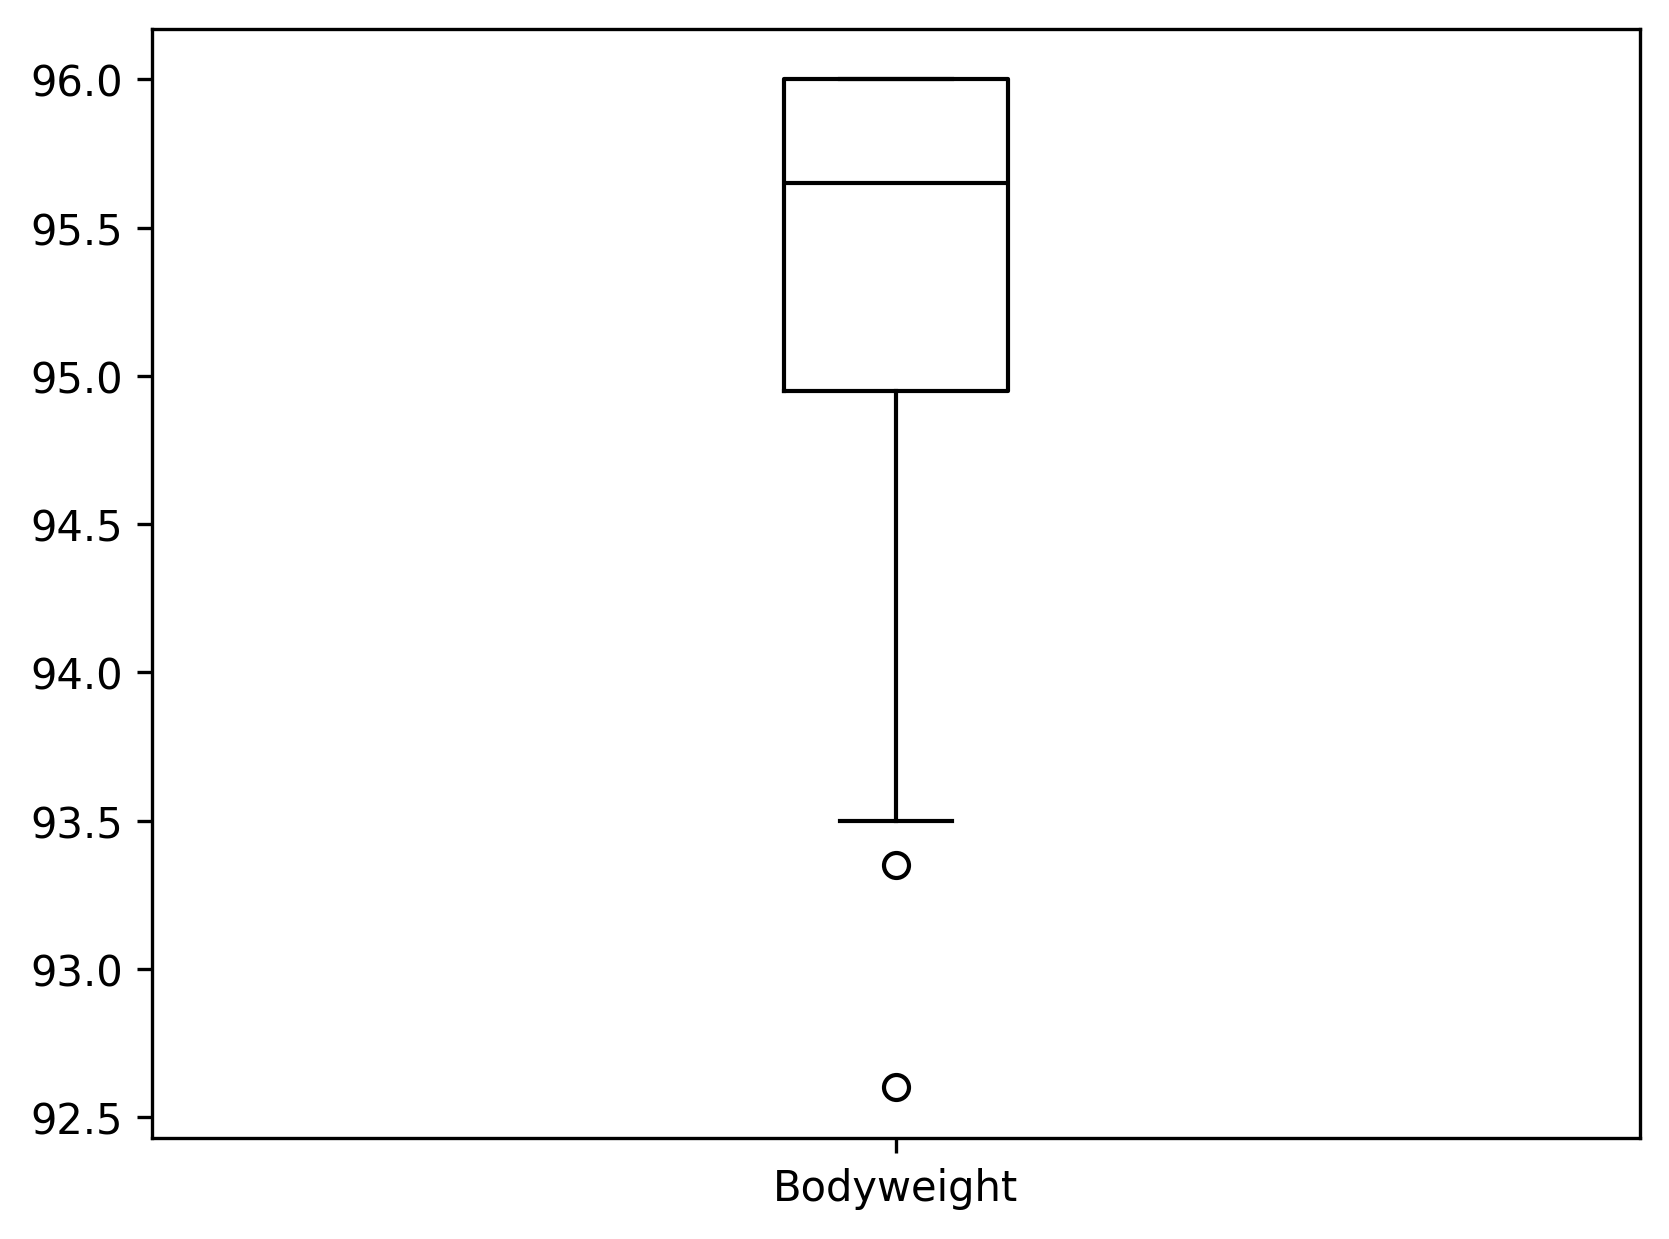

In [201]:
plt.boxplot(snatch["Bodyweight"])
plt.xticks([1], ["Bodyweight"])

(array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 2., 3., 0., 1., 0.,
        2., 8.]),
 array([92.6       , 92.77894737, 92.95789474, 93.13684211, 93.31578947,
        93.49473684, 93.67368421, 93.85263158, 94.03157895, 94.21052632,
        94.38947368, 94.56842105, 94.74736842, 94.92631579, 95.10526316,
        95.28421053, 95.46315789, 95.64210526, 95.82105263, 96.        ]),
 <BarContainer object of 19 artists>)

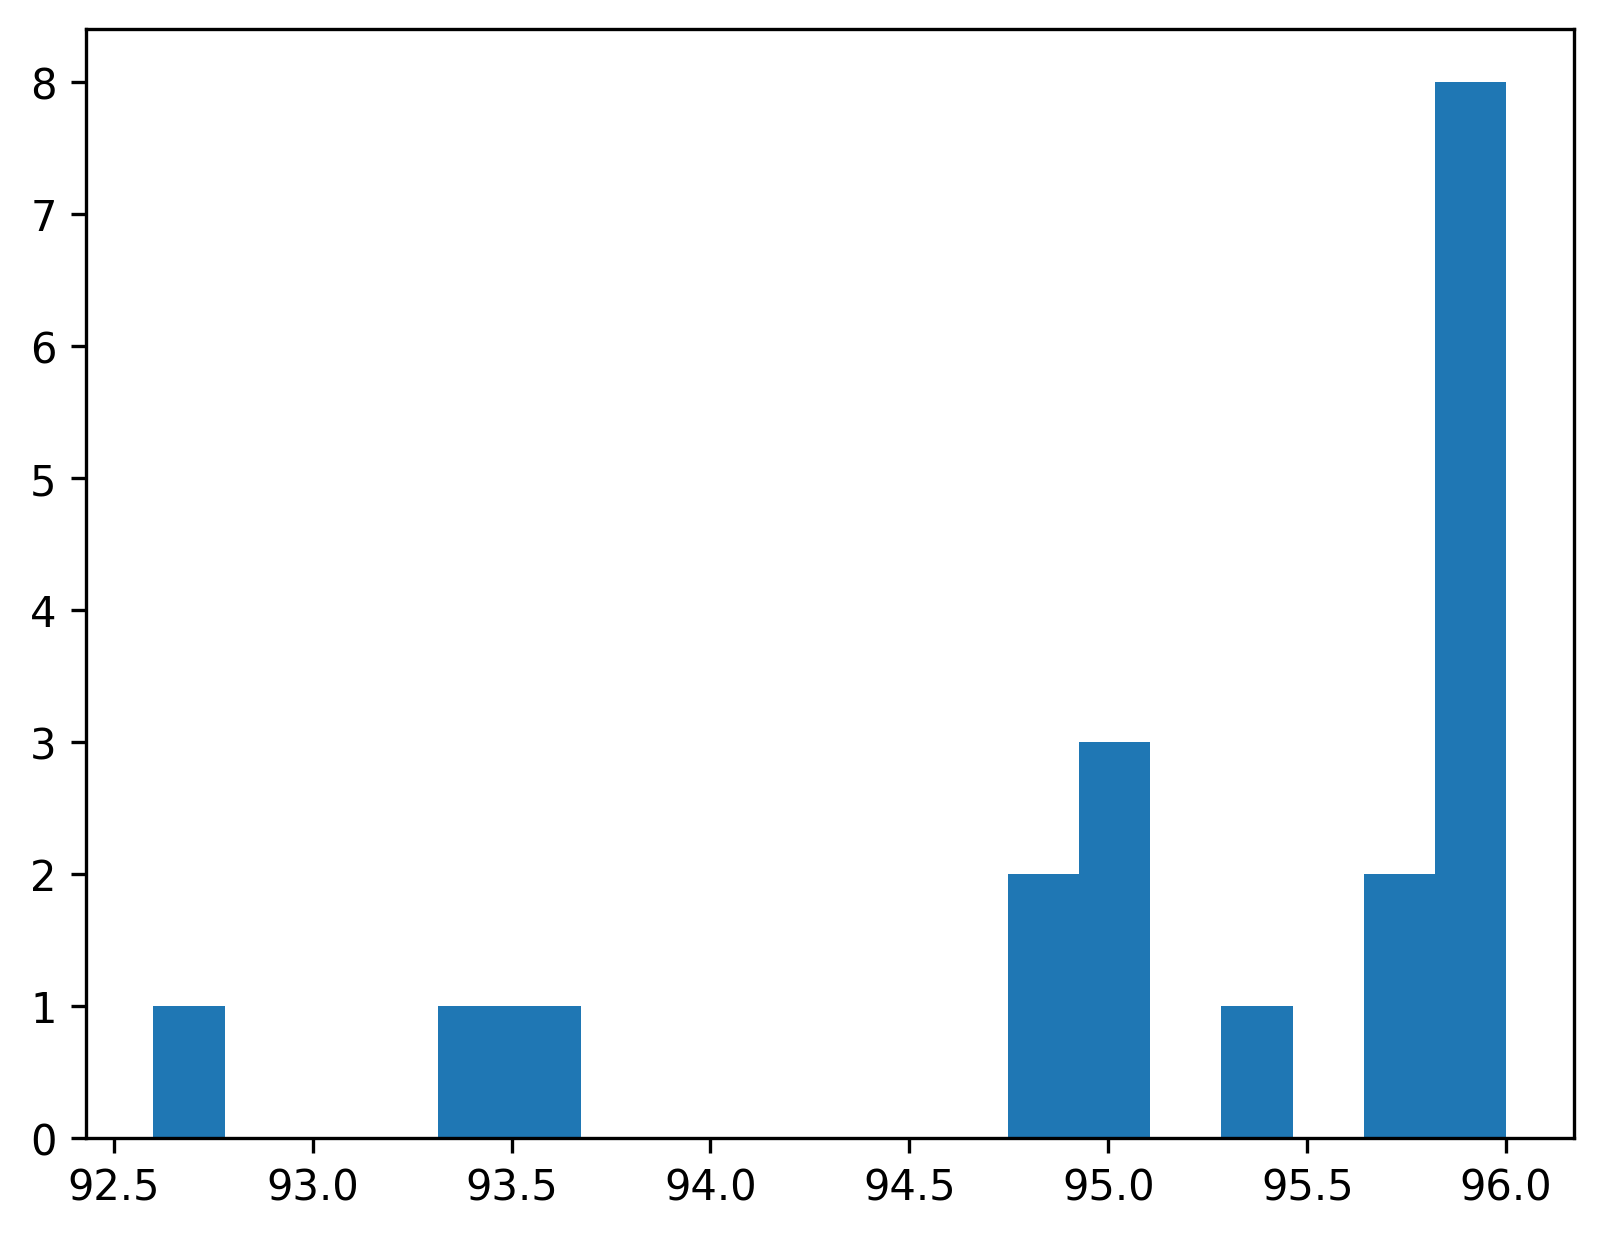

In [202]:
plt.hist(snatch["Bodyweight"], bins=len(snatch))

In [203]:
snatch[snatch["Bodyweight"].astype(float) == snatch["Bodyweight"].min()]

,Standing,Name,Born,Nation,Session,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result
10,11,SIMBUERGER Elias,28.03.2004,AUT,B,92.6,142,147,150,147


In [204]:
snatch.sort_values(by="Bodyweight").head()

,Standing,Name,Born,Nation,Session,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result
10,11,SIMBUERGER Elias,28.03.2004,AUT,B,92.60,142,147,150,147
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,174,180,188,188
15,16,DOBNIK Peter,08.07.1991,SLO,B,93.50,130,140,145,130
1,2,DAVITADZE Revaz,16.10.1998,GEO,A,94.75,167,171,174,174
14,15,TATARU Darius Stefan,19.12.2004,ROU,B,94.90,135,140,141,135


In [205]:
snatch_sorted_bw = snatch.sort_values(by="Bodyweight")

print("Difference in Snatch result between Nasar and lightest athlete")
print(snatch_sorted_bw.iloc[1]["Result"] - snatch_sorted_bw.iloc[0]["Result"])

print("Difference in Bodyweight between Nasar and lightest athlete")
print(snatch_sorted_bw.iloc[1]["Bodyweight"] - snatch_sorted_bw.iloc[0]["Bodyweight"])

Difference in Snatch result between Nasar and lightest athlete
41
Difference in Bodyweight between Nasar and lightest athlete
0.75


Nasar was not the lightest athlete in the -96kg category, he was the second lightest. He surpassed the lightest athlete in the snatch result by a 41kg difference.

In [206]:
print("Bodyweight Range")
print(snatch["Bodyweight"].max() - snatch["Bodyweight"].min())

print("Difference between Nasar's BW and mean")
print(snatch[snatch["Name"].str.contains("NASAR")]["Bodyweight"] - snatch["Bodyweight"].mean())

Bodyweight Range
3.4000000000000057
Difference between Nasar's BW and mean
0   -1.852632
Name: Bodyweight, dtype: float64


In [207]:
snatch_result_filtered = snatch[snatch["Result"] != 0]
snatch_result_filtered["Result"].describe()

count     18.000000
mean     151.222222
std       17.919938
min      125.000000
25%      135.000000
50%      149.500000
75%      163.750000
max      188.000000
Name: Result, dtype: float64

In [208]:
snatch_result_filtered["Result"].max() - snatch_result_filtered["Result"].min()

63

([<matplotlib.axis.XTick at 0x1433f1ae0>], [Text(1, 0, 'Snatch Result')])

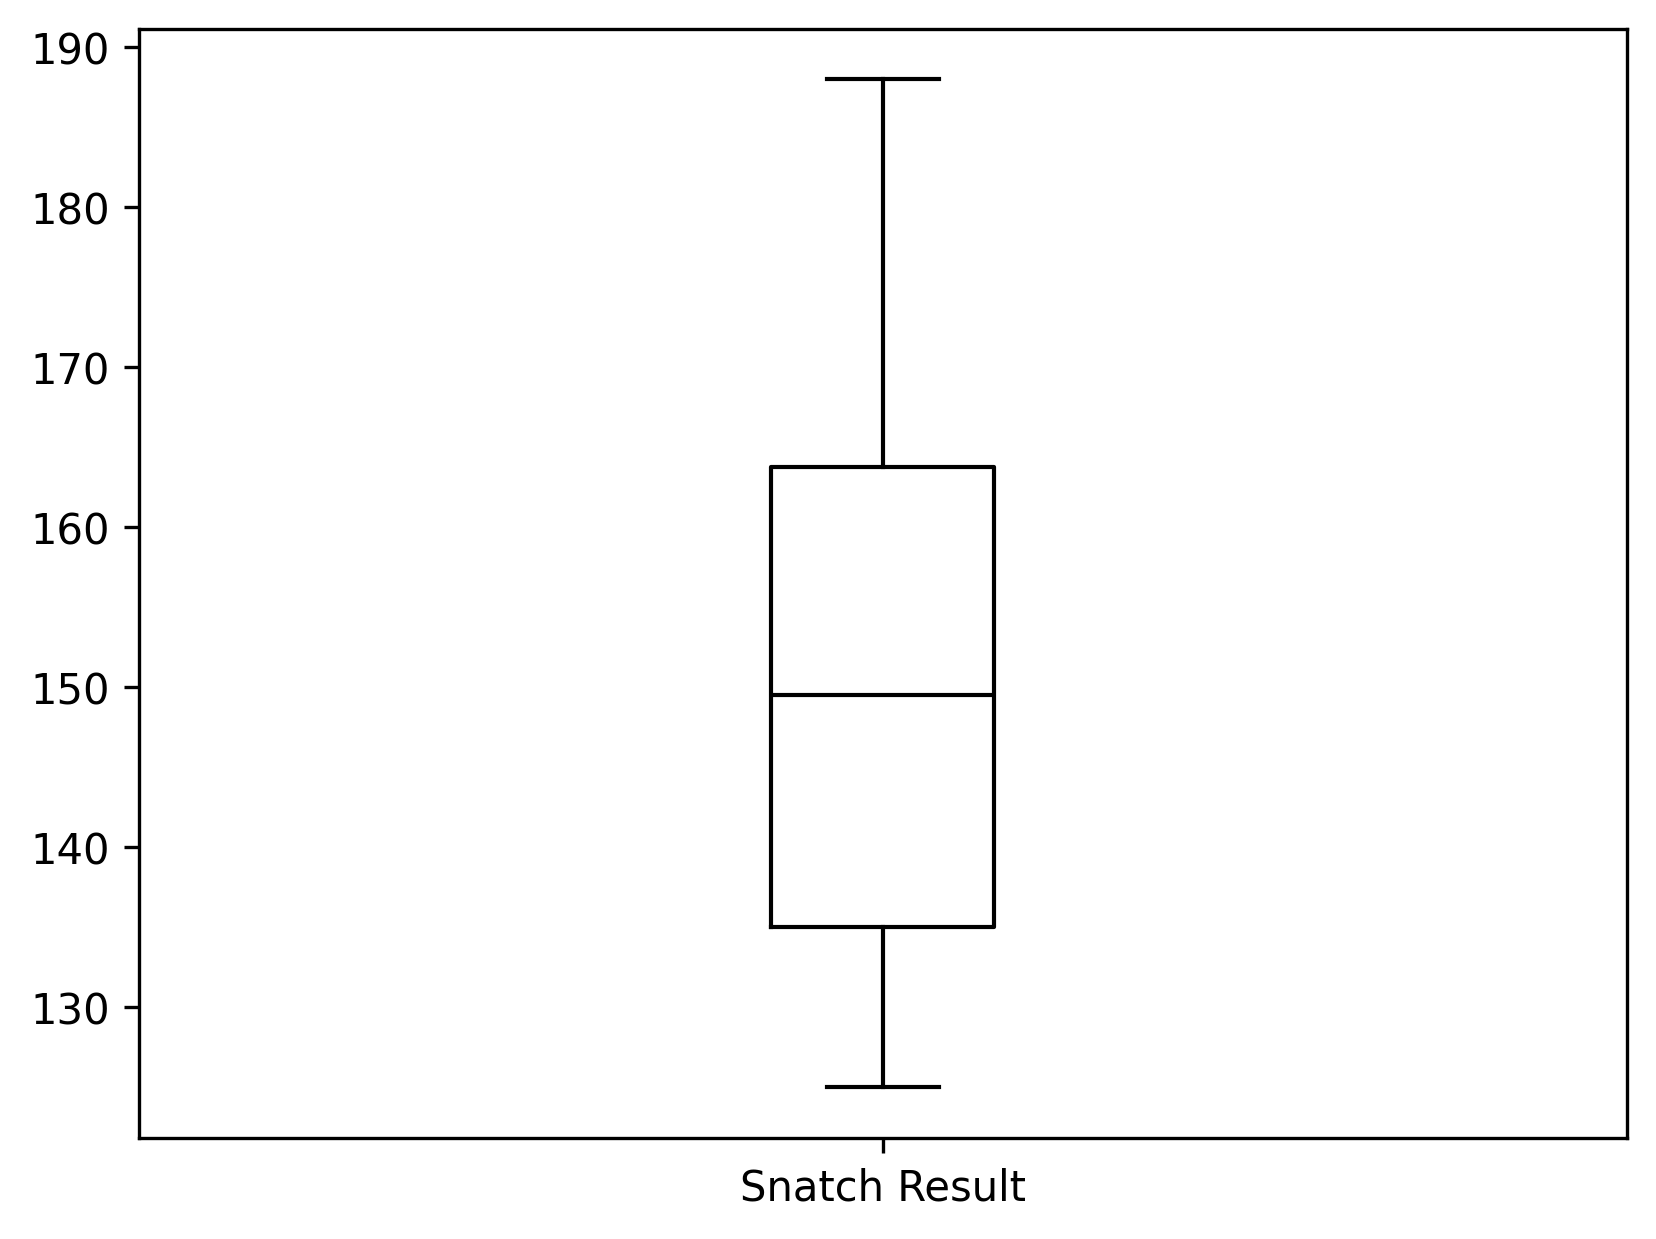

In [209]:
plt.boxplot(snatch_result_filtered["Result"])
plt.xticks([1], ["Snatch Result"])

In [210]:
snatch_result_filtered = snatch_result_filtered.sort_values(by="Result", ascending=False)
snatch_result_filtered[["Result", "Name", "Bodyweight"]].head()

,Result,Name,Bodyweight
0,188,NASAR Karlos May,93.35
1,174,DAVITADZE Revaz,94.75
2,173,HOVHANNISYAN Davit,95.85
3,166,GOBEJISHVILI Irakli,95.10
4,164,KLIMONOV Egor,96.00


(array([1., 2., 0., 3., 0., 1., 2., 1., 1., 0., 0., 3., 1., 0., 2., 0., 0.,
        0., 1.]),
 array([125.        , 128.31578947, 131.63157895, 134.94736842,
        138.26315789, 141.57894737, 144.89473684, 148.21052632,
        151.52631579, 154.84210526, 158.15789474, 161.47368421,
        164.78947368, 168.10526316, 171.42105263, 174.73684211,
        178.05263158, 181.36842105, 184.68421053, 188.        ]),
 <BarContainer object of 19 artists>)

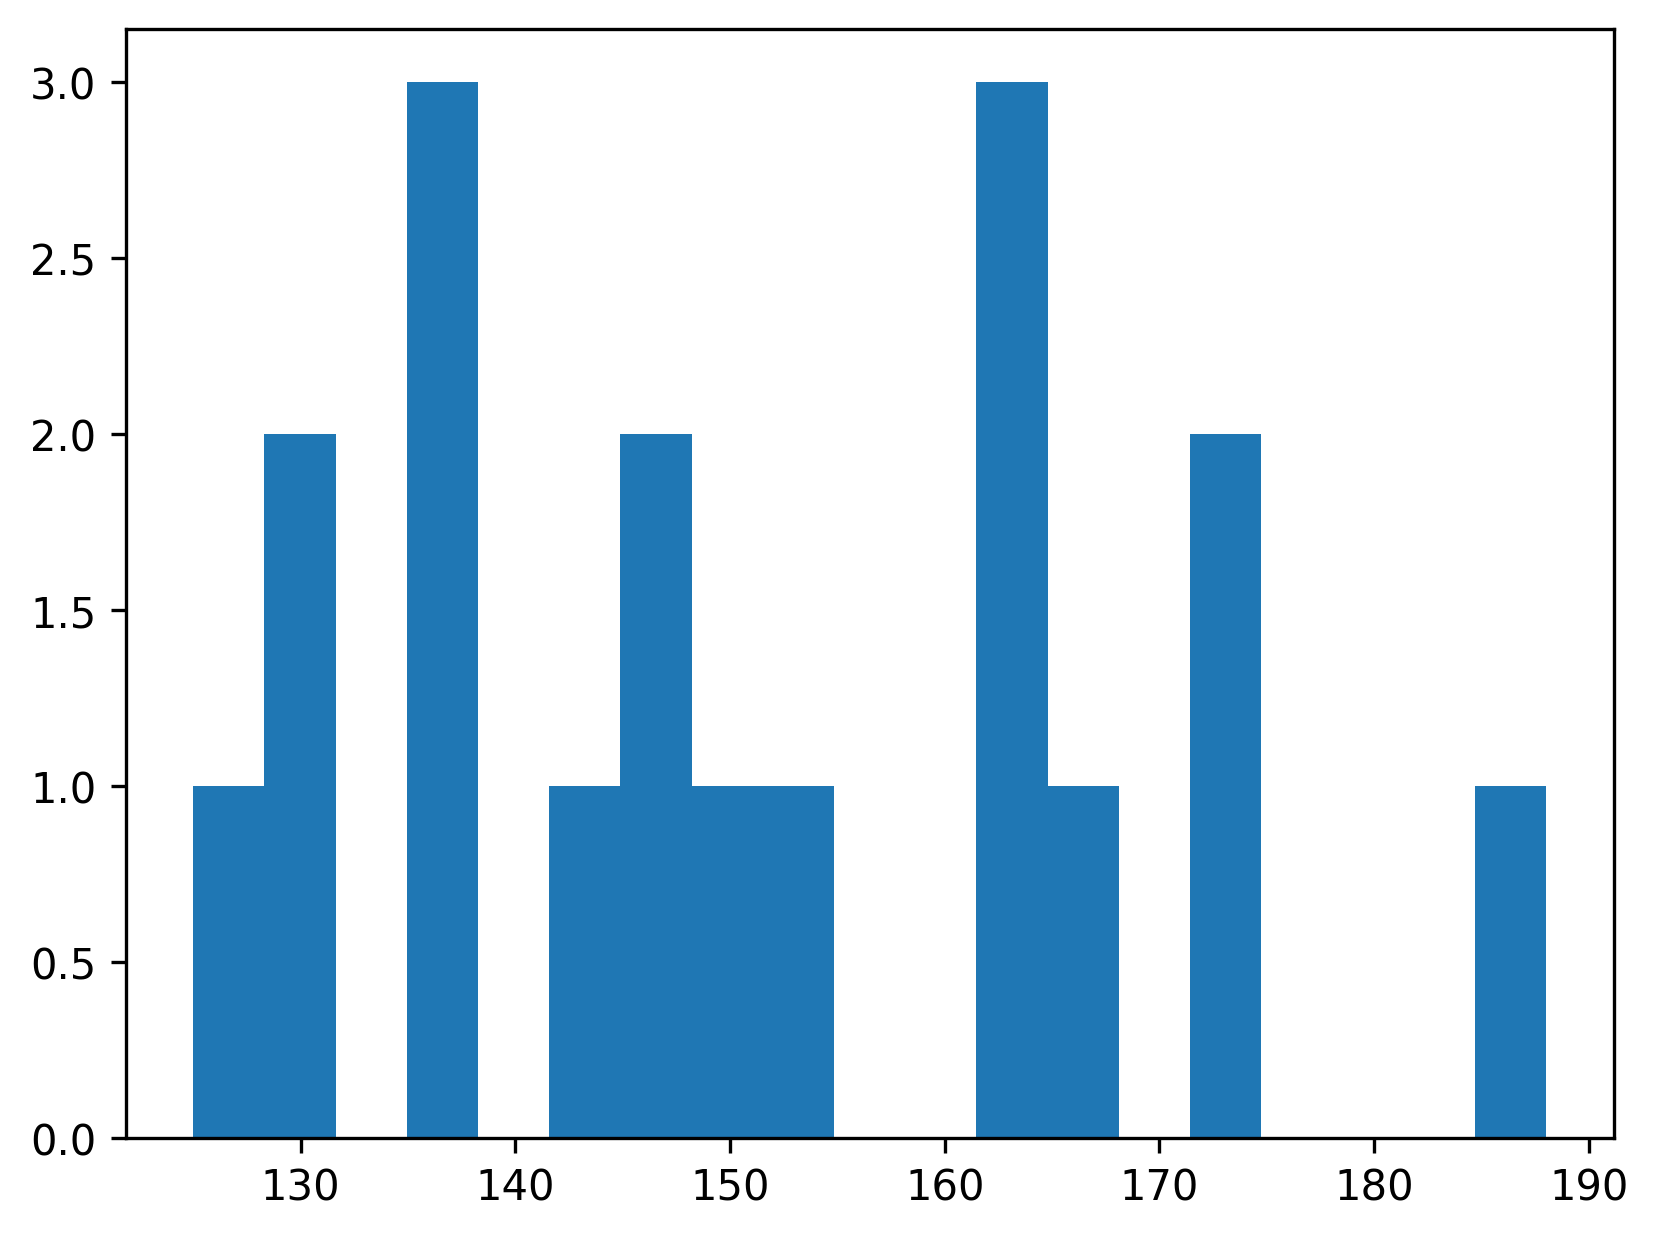

In [211]:
plt.hist(snatch_result_filtered["Result"], bins=len(snatch))

In [212]:
snatch_result_filtered.iloc[0]["Result"] - snatch_result_filtered.iloc[1]["Result"]

14

In [213]:
snatch_result_filtered.iloc[0]["Bodyweight"] - snatch_result_filtered.iloc[1]["Bodyweight"]

-1.4000000000000057

Karlos Nasar beat the second place by 14 kilos while weighing 1.4kg less in bodyweight

In [214]:
snatch_result_filtered["JumpSecondToThird"] = snatch_result_filtered["ThirdAttempt"] - snatch_result_filtered["SecondAttempt"]
snatch_result_filtered.sort_values(by="JumpSecondToThird", ascending=False).head()

,Standing,Name,Born,Nation,Session,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result,JumpSecondToThird
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,174,180,188,188,8
3,4,GOBEJISHVILI Irakli,10.10.2000,GEO,A,95.10,161,161,166,166,5
15,16,DOBNIK Peter,08.07.1991,SLO,B,93.50,130,140,145,130,5
7,8,MARGULIS Yanush,04.02.2006,ISR,B,95.10,149,149,153,153,4
16,17,PELTOKANGAS Antti,20.05.1995,FIN,B,96.00,130,130,134,130,4


When setting the new European and World Senior Record in the Snatch, Karlos jumped 8kg from the second attempt to the third. On his second attempt in the Snatch competition, he had already beat the second place Davitadze, so he was free to do whatever he wanted. The previous world record was 187kg by Lesman Paredes at the World Weightlifting Championships 2021

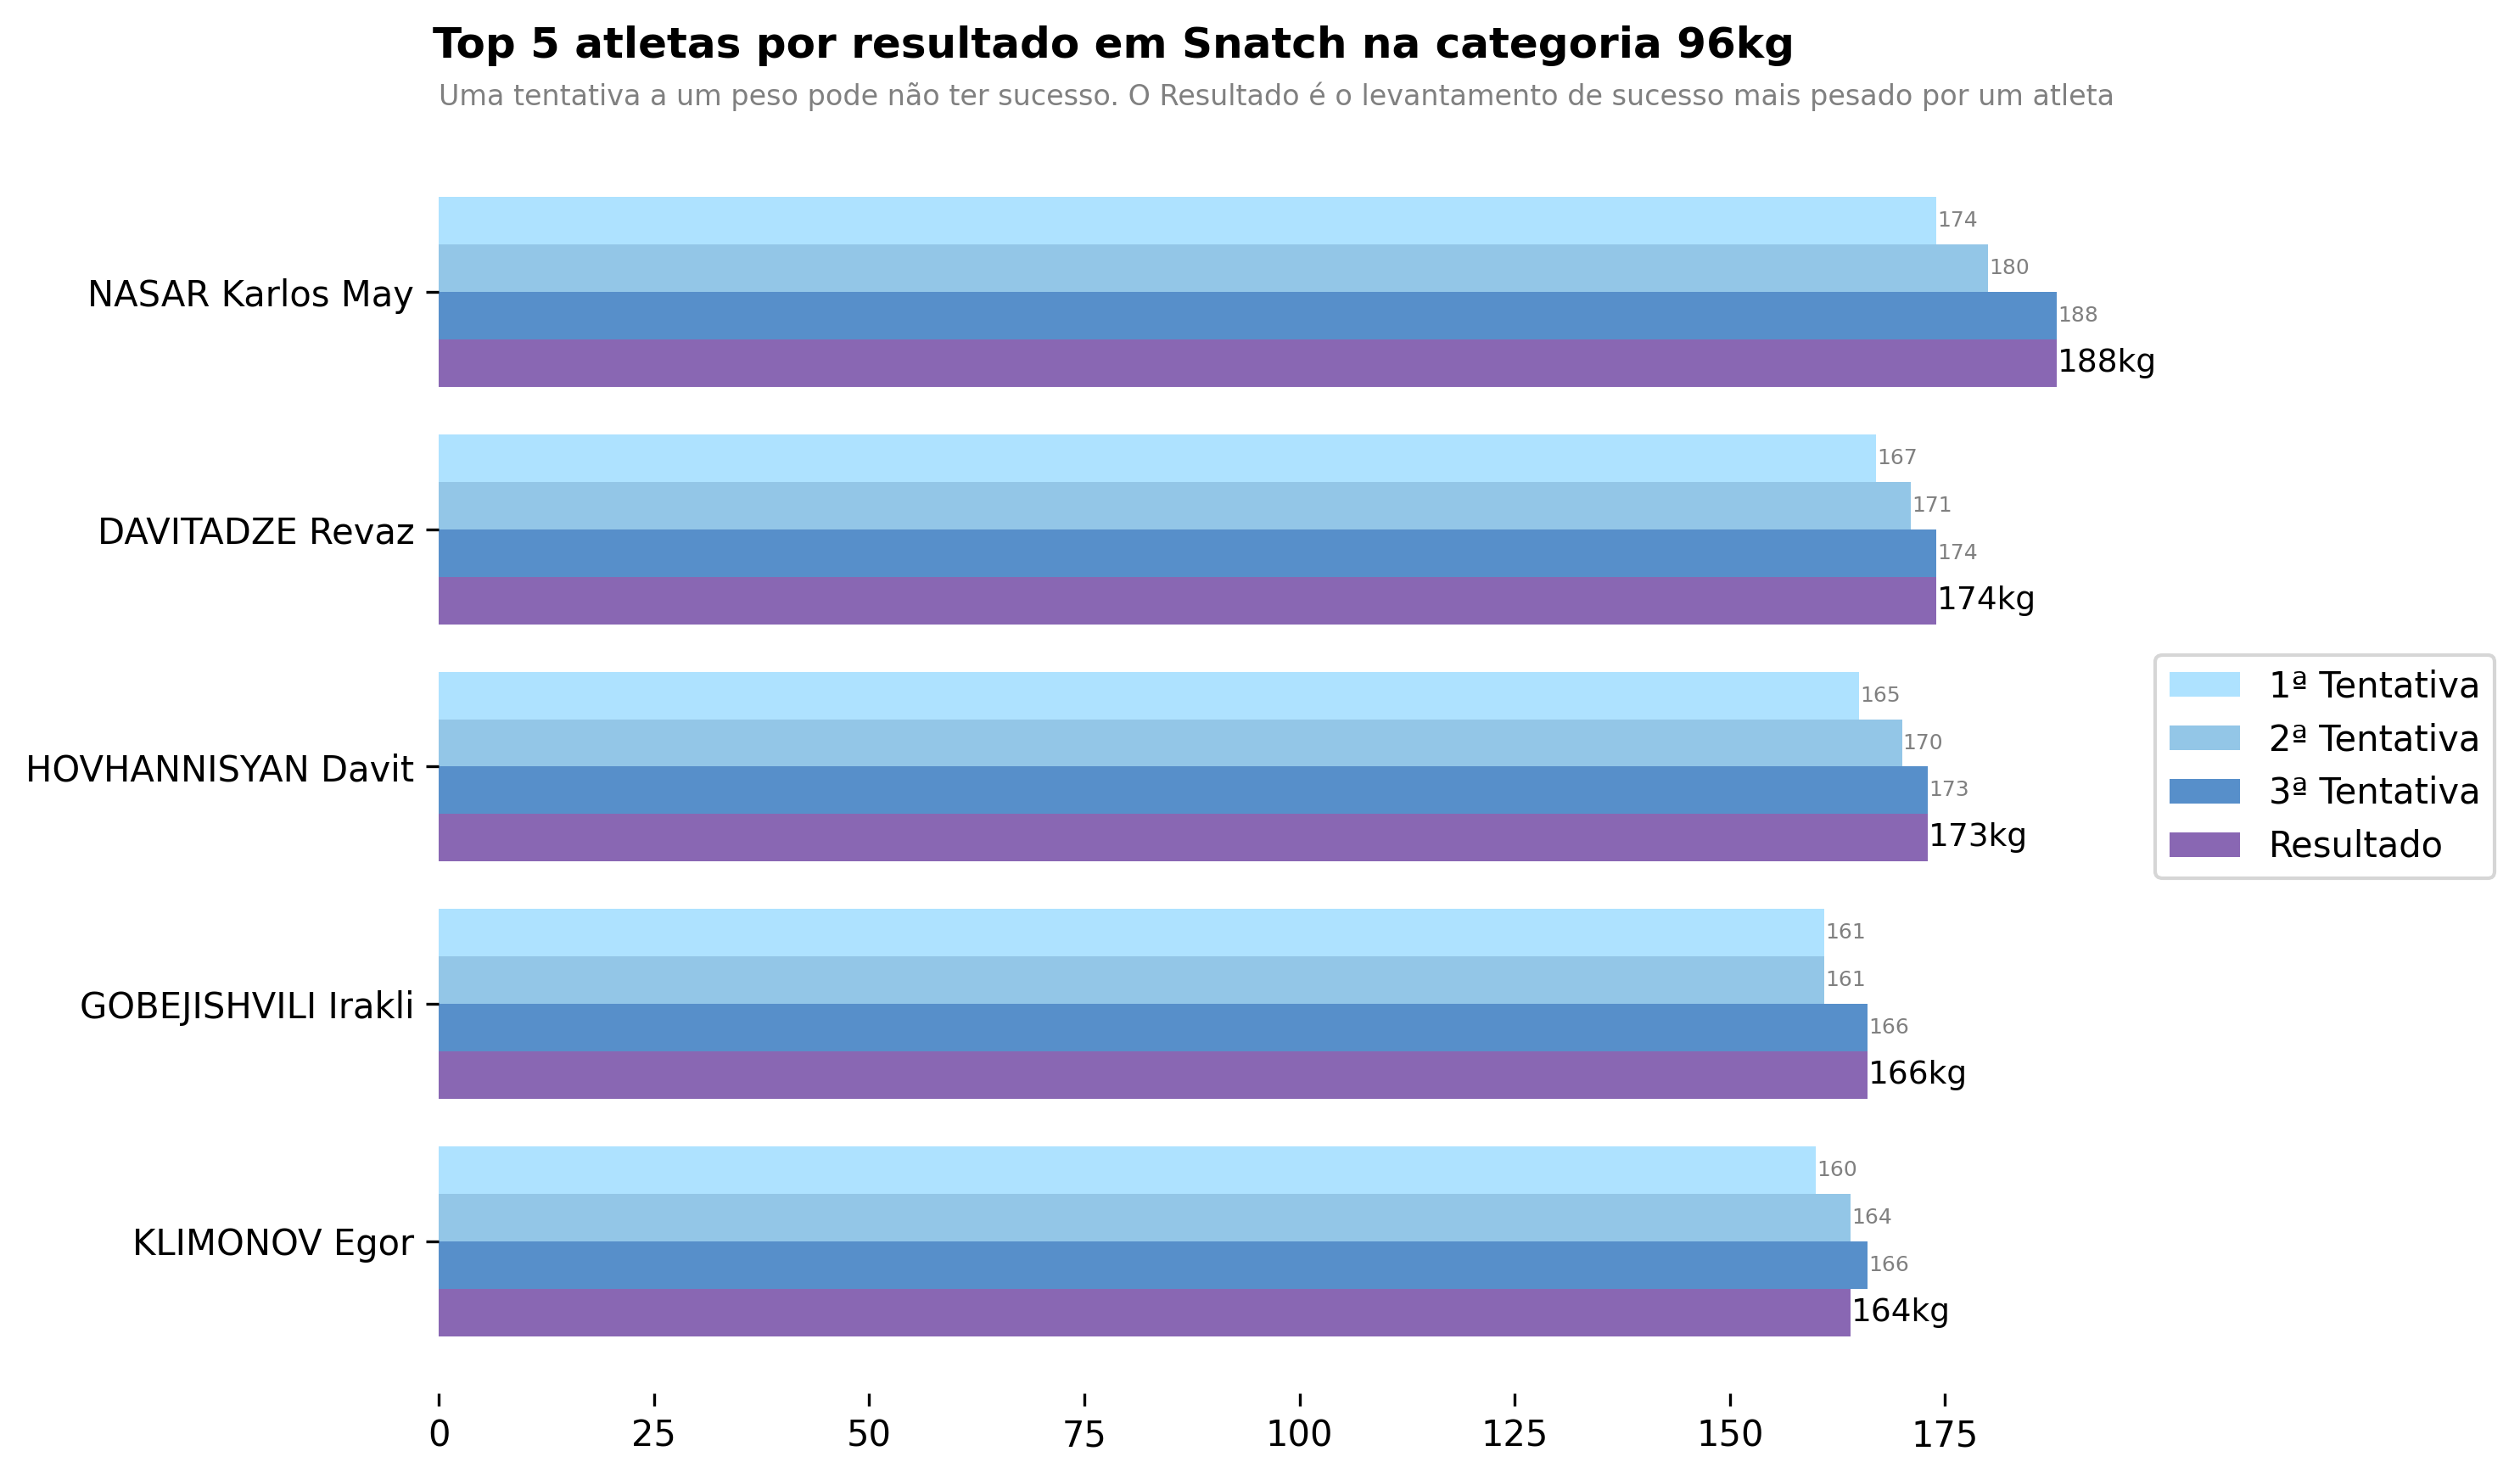

In [215]:
top5_snatch = snatch.sort_values(by="Result", ascending=False).iloc[:5]
plot_top5_attempts(top5_snatch, "Snatch")

Out of the top 5, all except Egor Klimonov made their last attempts. The bar chart shows how Karlos shoots ahead of the second place. It's remarkable how his FIRST attempt matches the second place's highest attempt

## Clean and Jerk

In [216]:
cj = cj.sort_values(by="Result", ascending=False)
cj.head()

,Standing,Name,Born,Nation,Session,Bodyweight,FirstAttempt,SecondAttempt,ThirdAttempt,Result
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,210,220,229,229
1,2,DAVITADZE Revaz,16.10.1998,GEO,A,94.75,201,205,208,205
2,3,HOVHANNISYAN Davit,14.01.1997,ARM,A,95.85,203,207,207,203
3,4,KLIMONOV Egor,24.08.1992,AIN,A,96.00,202,203,207,203
4,5,ADAMUS Bartlomiej,12.05.2000,POL,A,96.00,192,197,201,197


In [217]:
cj["Result"].describe()

count     19.000000
mean     187.526316
std       16.570953
min      160.000000
25%      172.500000
50%      190.000000
75%      196.000000
max      229.000000
Name: Result, dtype: float64

In [218]:
cj.iloc[0]["Result"] - cj["Result"].mean()

41.47368421052633

In [219]:
cj.iloc[0]["Result"] - cj.iloc[1]["Result"], cj.iloc[0]["Bodyweight"] - cj.iloc[1]["Bodyweight"]

(24, -1.4000000000000057)

Karlos also set a new European Senior record in the Clean and Jerk with 229kg, beating the second place by an astonishing 24kg, also weighing 1.4kg less. The current Senior World Record is 231kg set by Tian Tao in Tokyo, 2019, at the test event of the Tokyo olympics venue. Just 2kg above Karlos' current European Record. The previous Europeran record was 222kg by Yauheni Tsikhantsou, also in 2019. Goes to show how Karlos is dominating on an european level

([<matplotlib.axis.XTick at 0x14327a9b0>], [Text(1, 0, 'Clean & Jerk Result')])

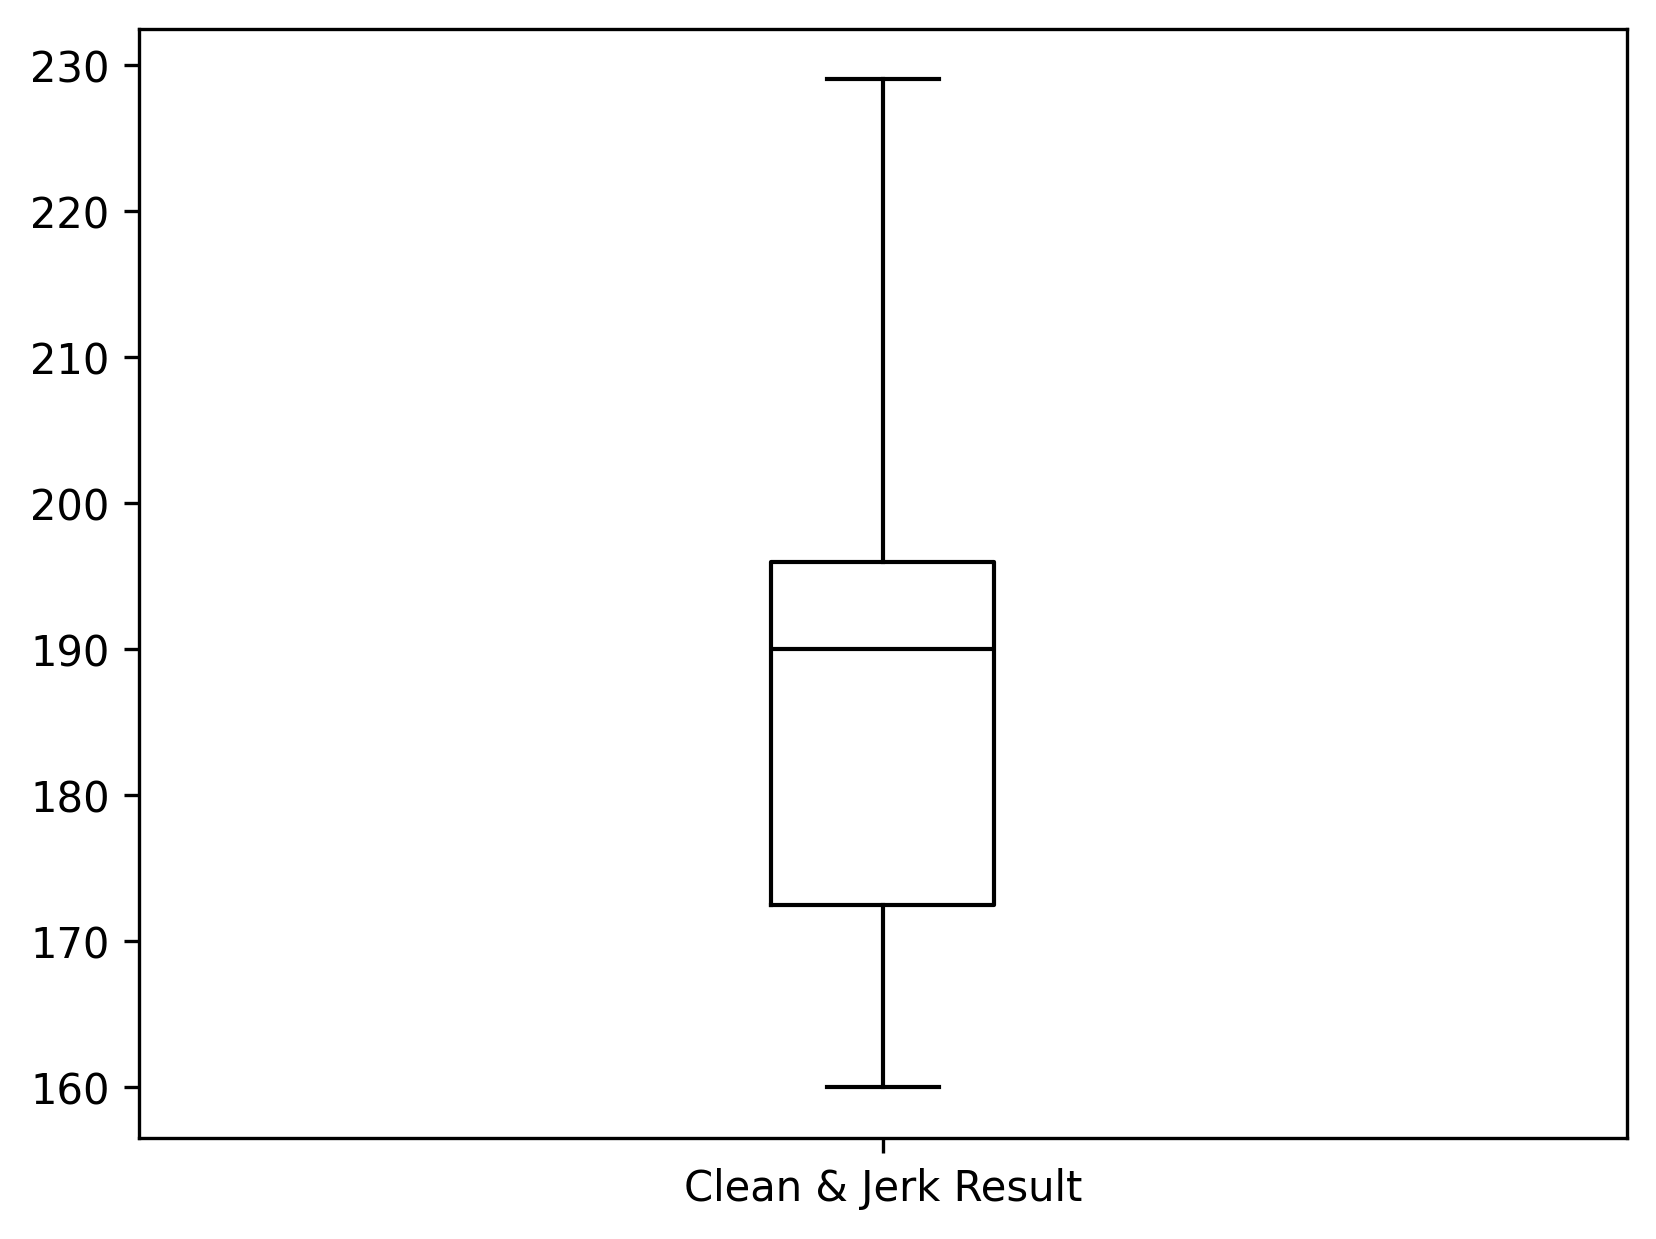

In [220]:
plt.boxplot(cj["Result"])
plt.xticks([1], ["Clean & Jerk Result"])

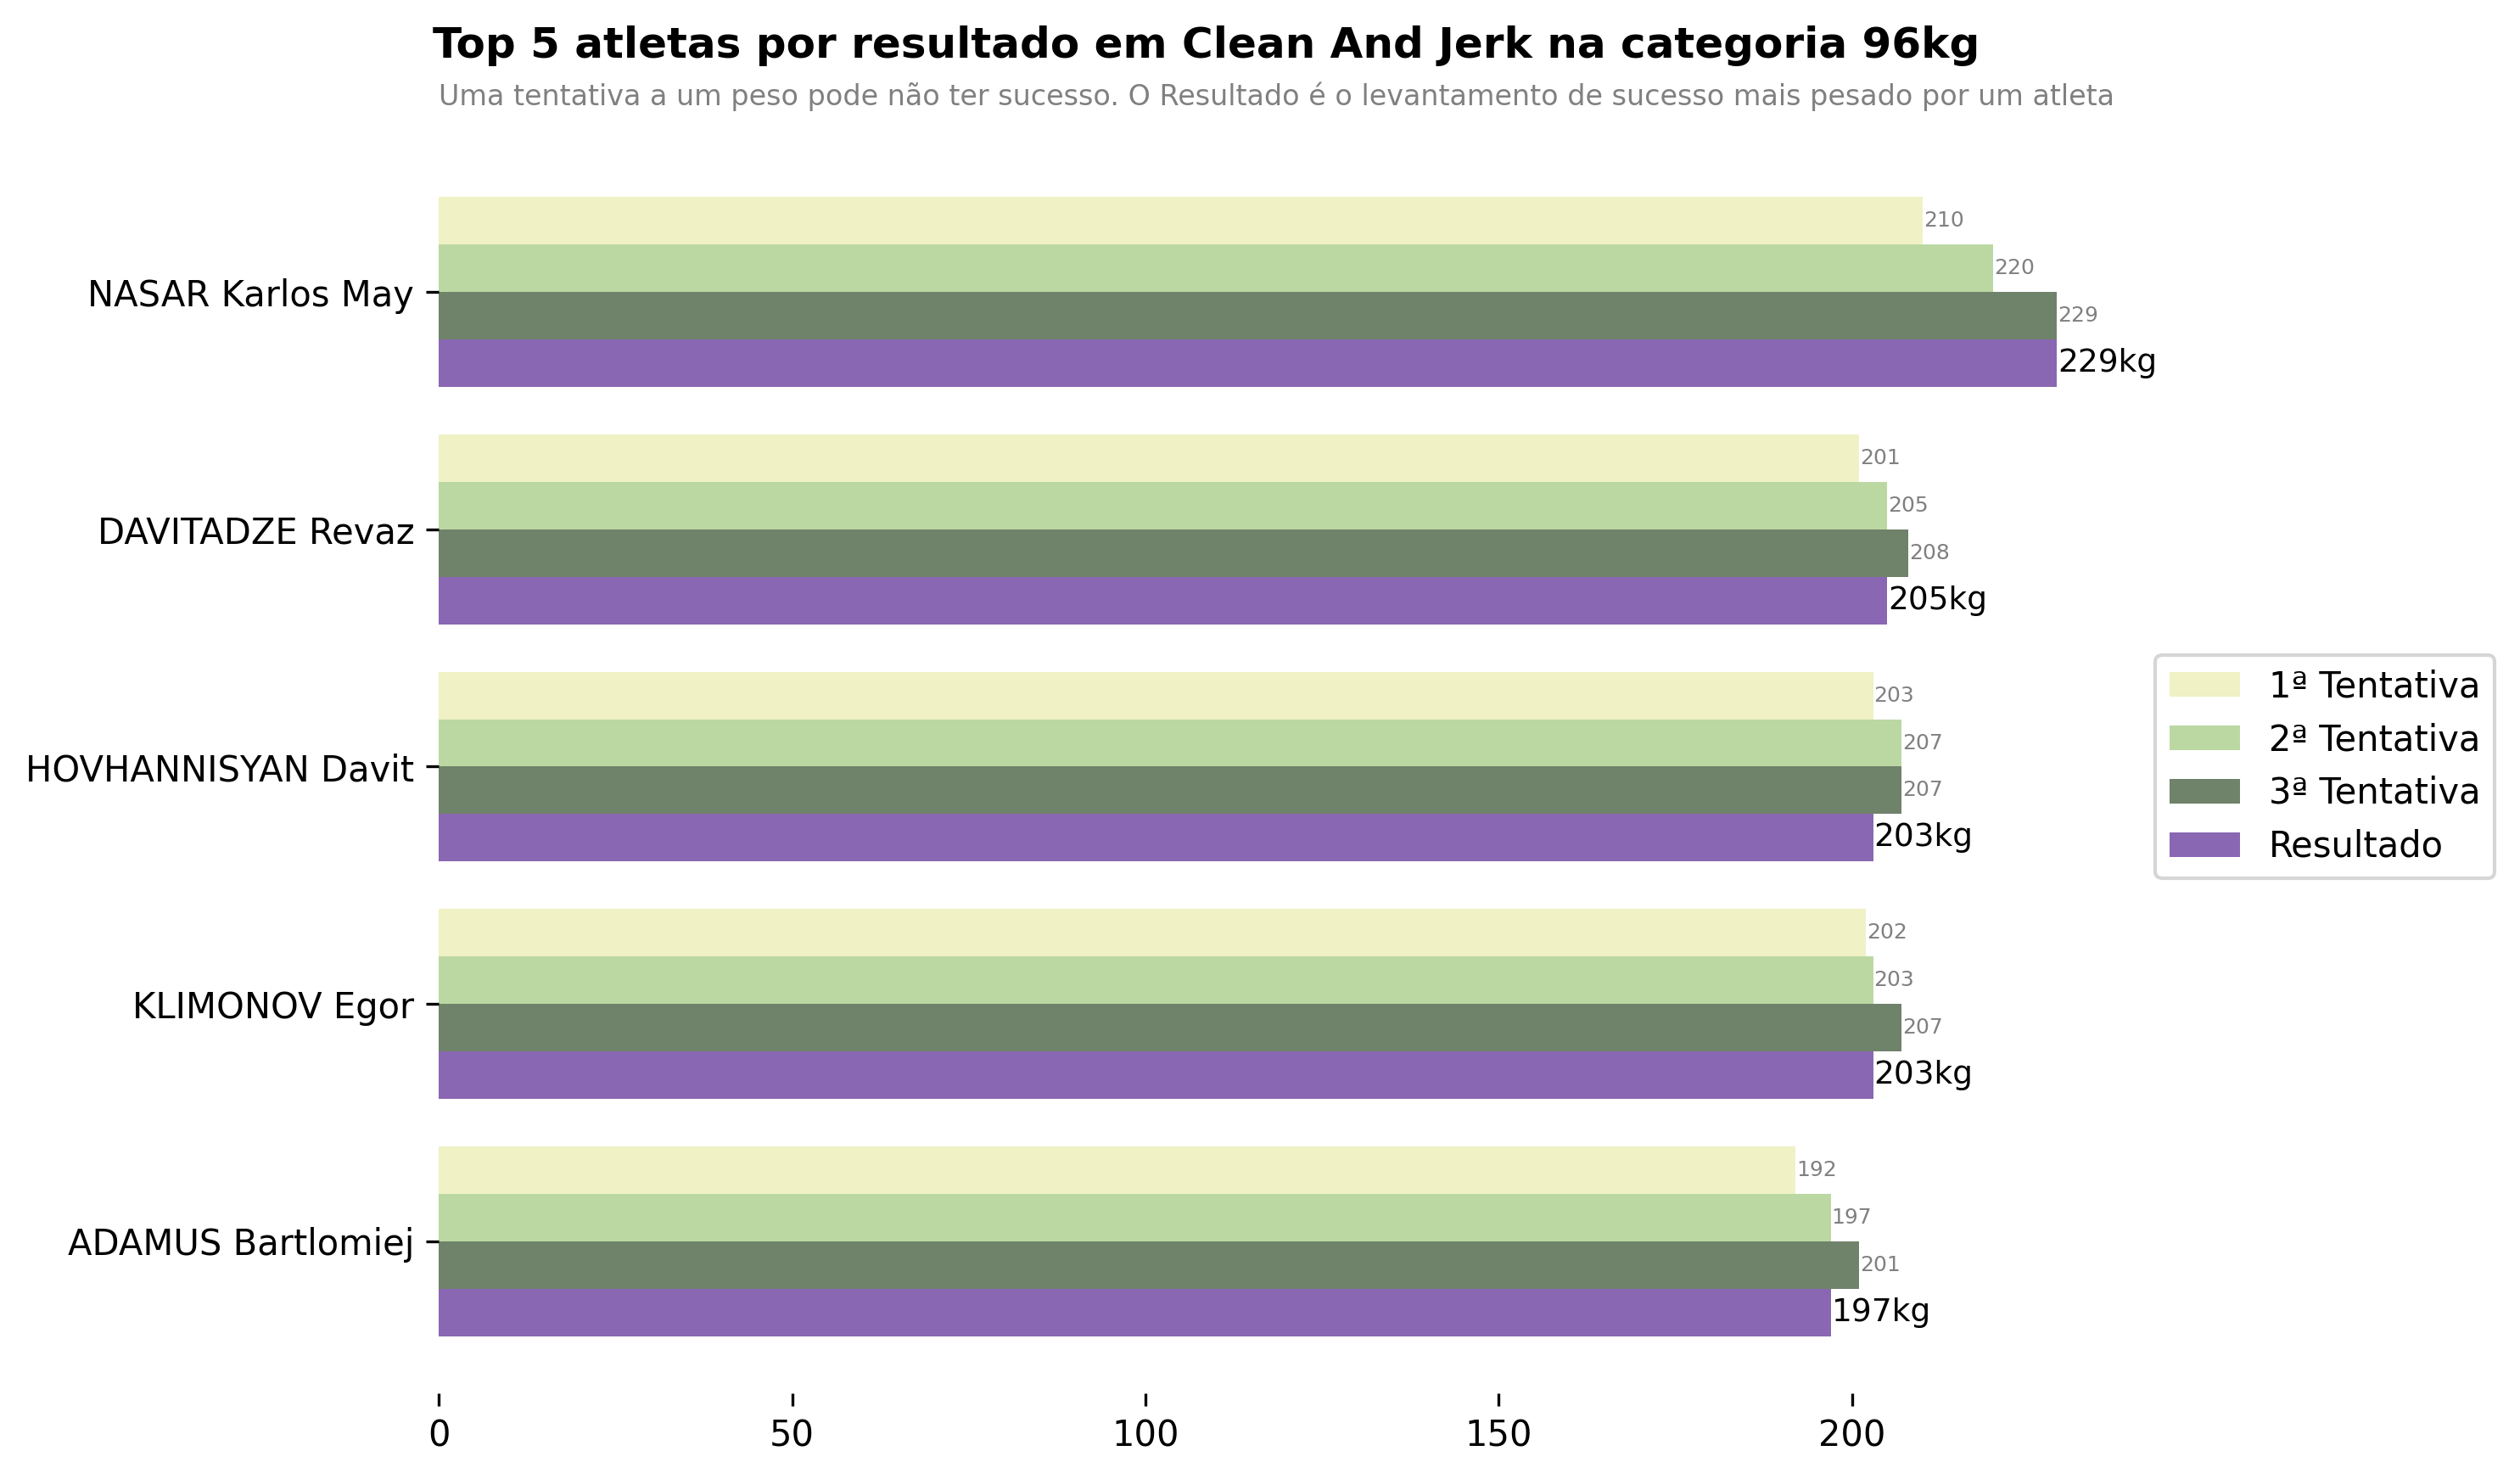

In [221]:
top5_cj = cj.sort_values(by="Result", ascending=False).iloc[:5]
plot_top5_attempts(top5_cj, "Clean And Jerk")

For the top 5 athletes, only Karlos made his last attempt and got the result from it. All other athletes missed at least the last attempt and got their results from a previous attempt

In [222]:
cj[cj["Name"].str.contains("NASAR") | cj["Name"].str.contains("DAVITADZE")] \
[["Name", "FirstAttempt", "Result"]].head()

,Name,FirstAttempt,Result
0,NASAR Karlos May,210,229
1,DAVITADZE Revaz,201,205


Karlos' first attempt was 5kg above the second place's result. Another evidence of the Bulgarian's domination

## Total and Robi Points

In [223]:
total = total.sort_values(by="Total", ascending=False)
total.head()

,Standing,Name,Born,Nation,Session,Bodyweight,Snatch,CleanAndJerk,Total
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,188,229,417
1,2,DAVITADZE Revaz,16.10.1998,GEO,A,94.75,174,205,379
2,3,HOVHANNISYAN Davit,14.01.1997,ARM,A,95.85,173,203,376
3,4,KLIMONOV Egor,24.08.1992,AIN,A,96.00,164,203,367
4,5,GOBEJISHVILI Irakli,10.10.2000,GEO,A,95.10,166,194,360


In [224]:
total["Total"].describe()

count     19.000000
mean     330.789474
std       46.904843
min      191.000000
25%      313.000000
50%      325.000000
75%      359.500000
max      417.000000
Name: Total, dtype: float64

In [225]:
total.iloc[0]["Total"] - total.iloc[1]["Total"]

38

On total, he surpassed the second place by an astonishing 38kg, which is incredibly far away between podium totals. 

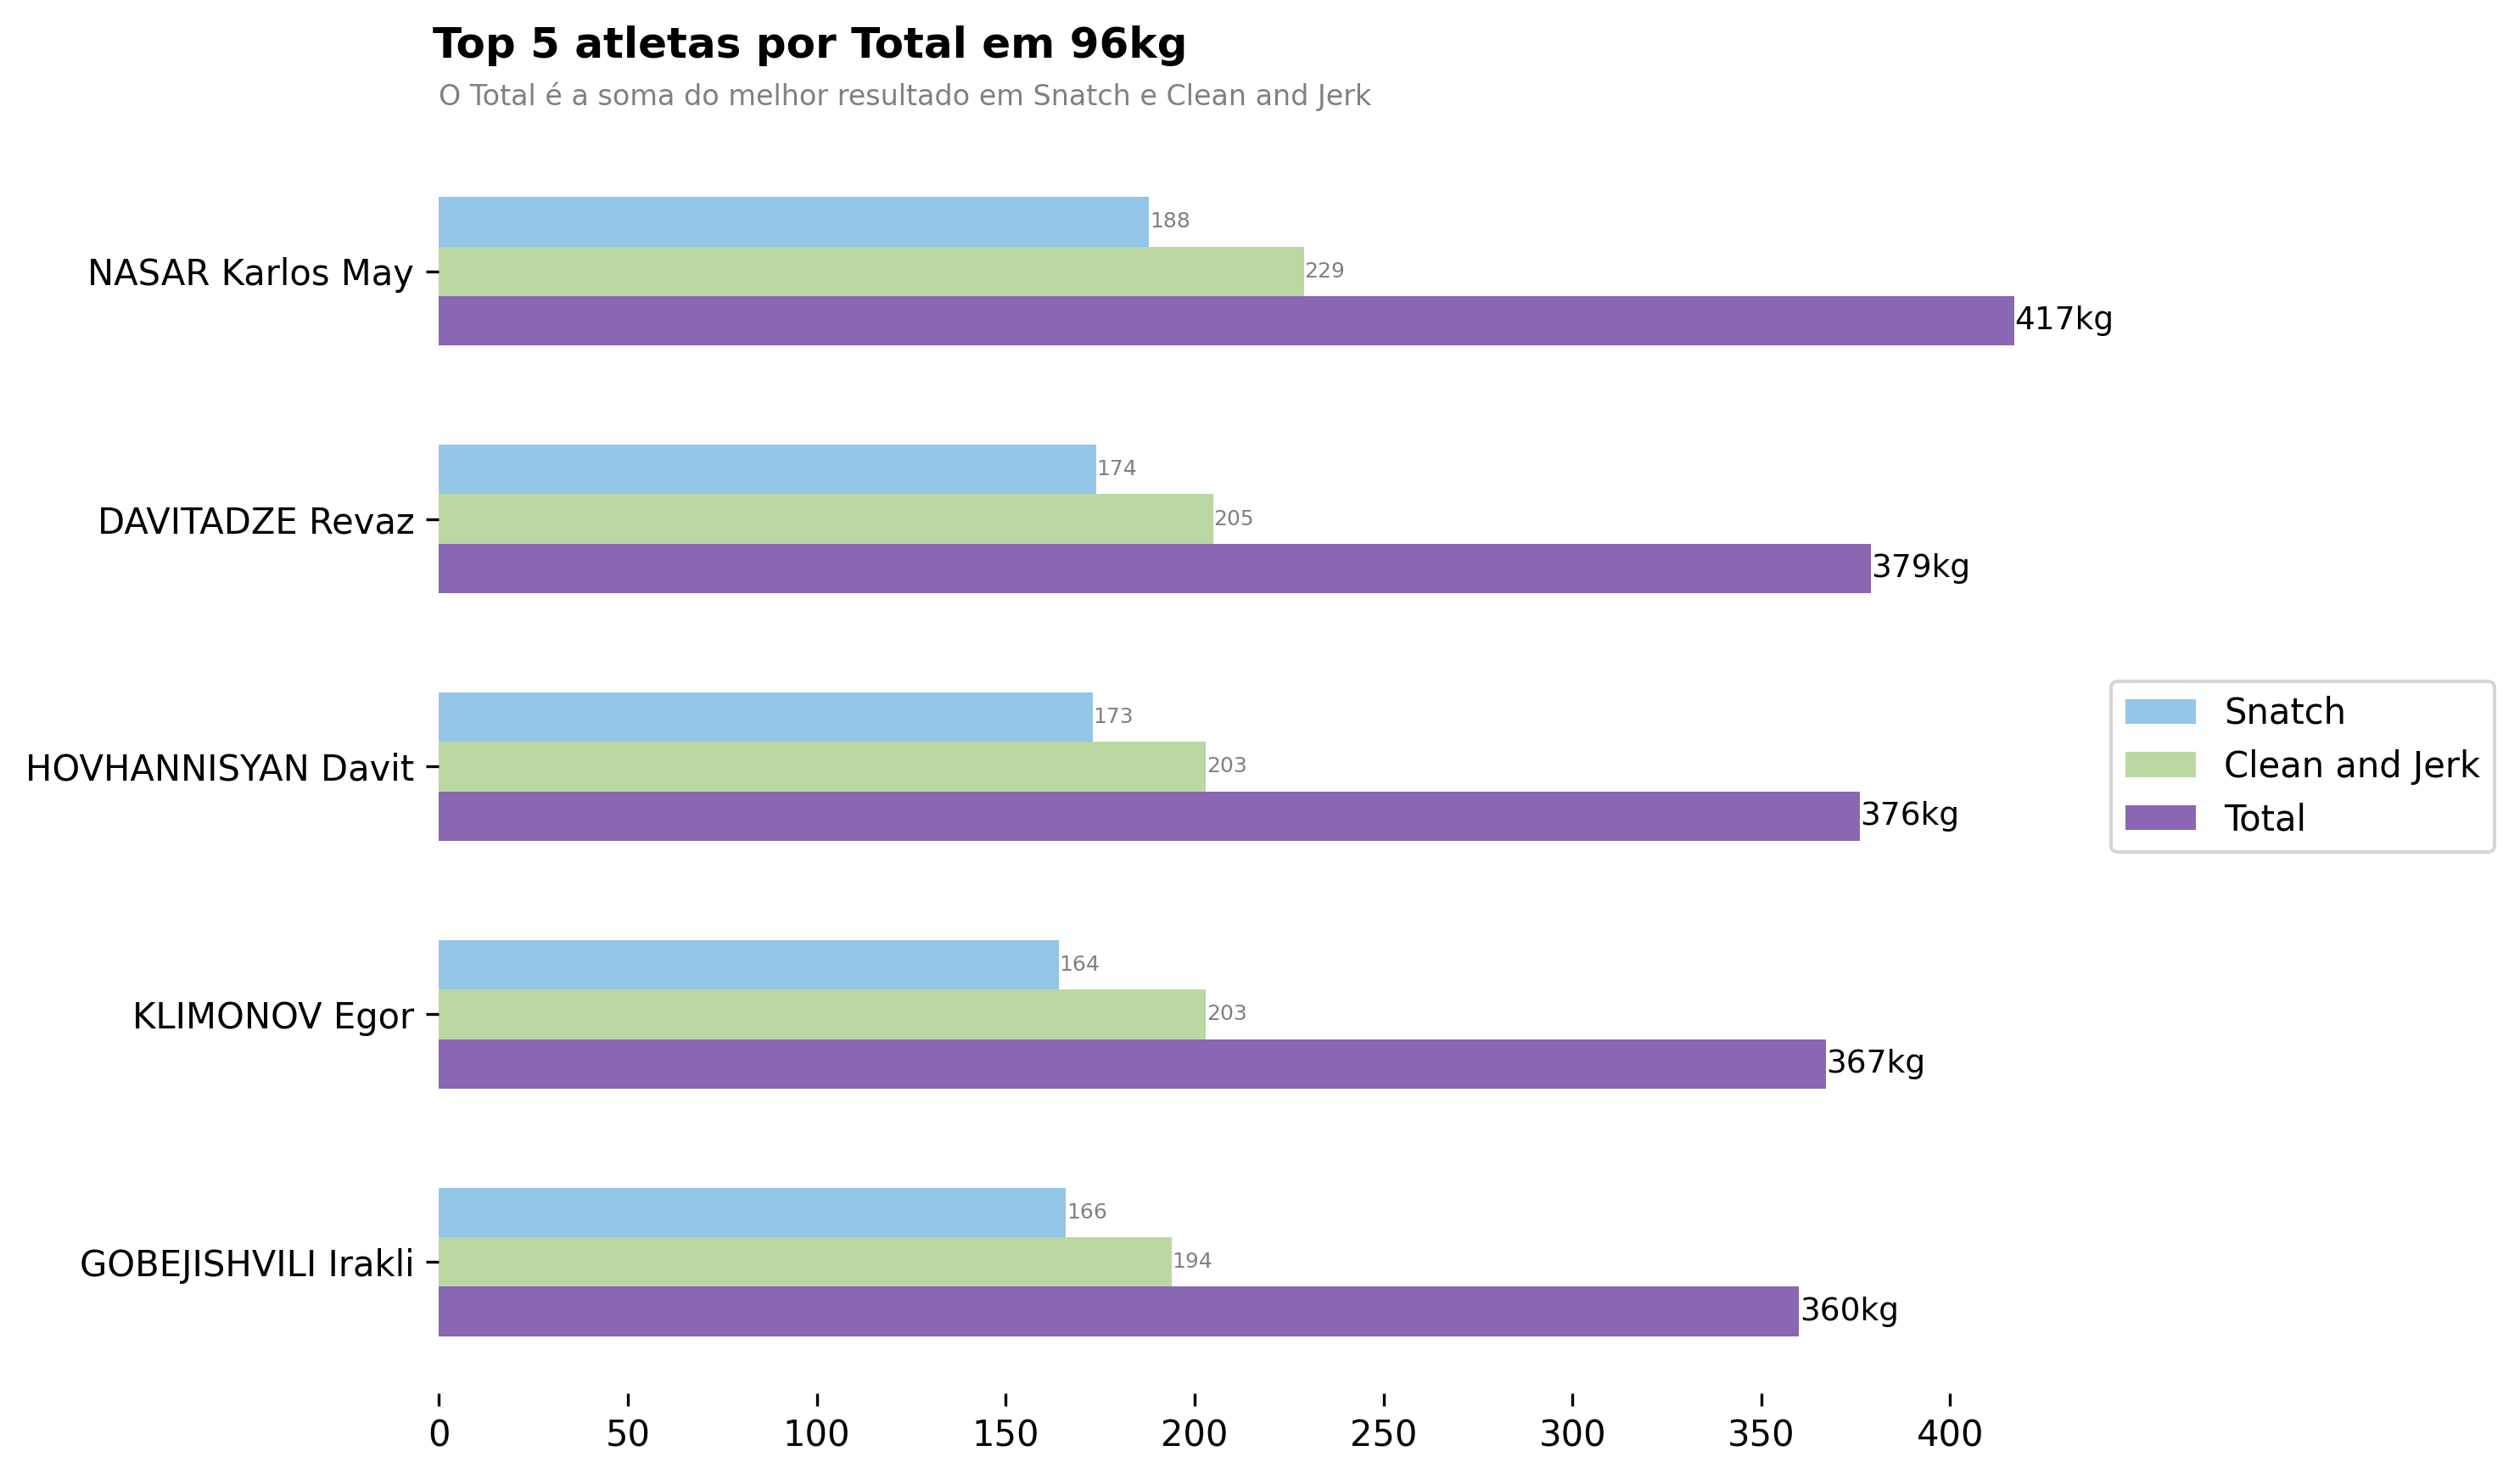

In [226]:
top5_total = total.sort_values(by="Total", ascending=False).iloc[:5]
plot_total_info(top5_total, (0.175, 0.96))

The Robi Points score is the official IWF metric for comparing atheletes in a unified form across weight classes. The greater, the better

In [227]:
robi = robi.sort_values(by="Points", ascending=False)
robi.head()

,Standing,Name,Born,Nation,Category,CategoryRecord,AthleteTotal,Points
0,1,NASAR Karlos May,12.06.2004,BUL,96 kg,416,417,1008.0077
1,2,TSIKHANTSOU Yauheni,04.11.1998,AIN,102 kg,413,399,891.7579
2,3,RUIZ I VELASCO Marcos,13.10.1996,ESP,102 kg,413,397,876.9952
3,4,GENC Yusuf Fehmi,23.05.2002,TUR,73 kg,365,348,853.4751
4,5,KARAPETYAN Garik,11.06.2003,ARM,109 kg,435,411,828.1767


In [228]:
robi["Points"].describe()

count     134.000000
mean      545.543383
std       152.877774
min        75.333700
25%       435.378775
50%       538.903700
75%       636.059250
max      1008.007700
Name: Points, dtype: float64

In [229]:
robi["Points"].iloc[0] - robi["Points"].iloc[1]

116.24980000000005

Nasar scores an unbelievable 1008.0077 on the Robi scale, which is more than 116 above the second place in the list

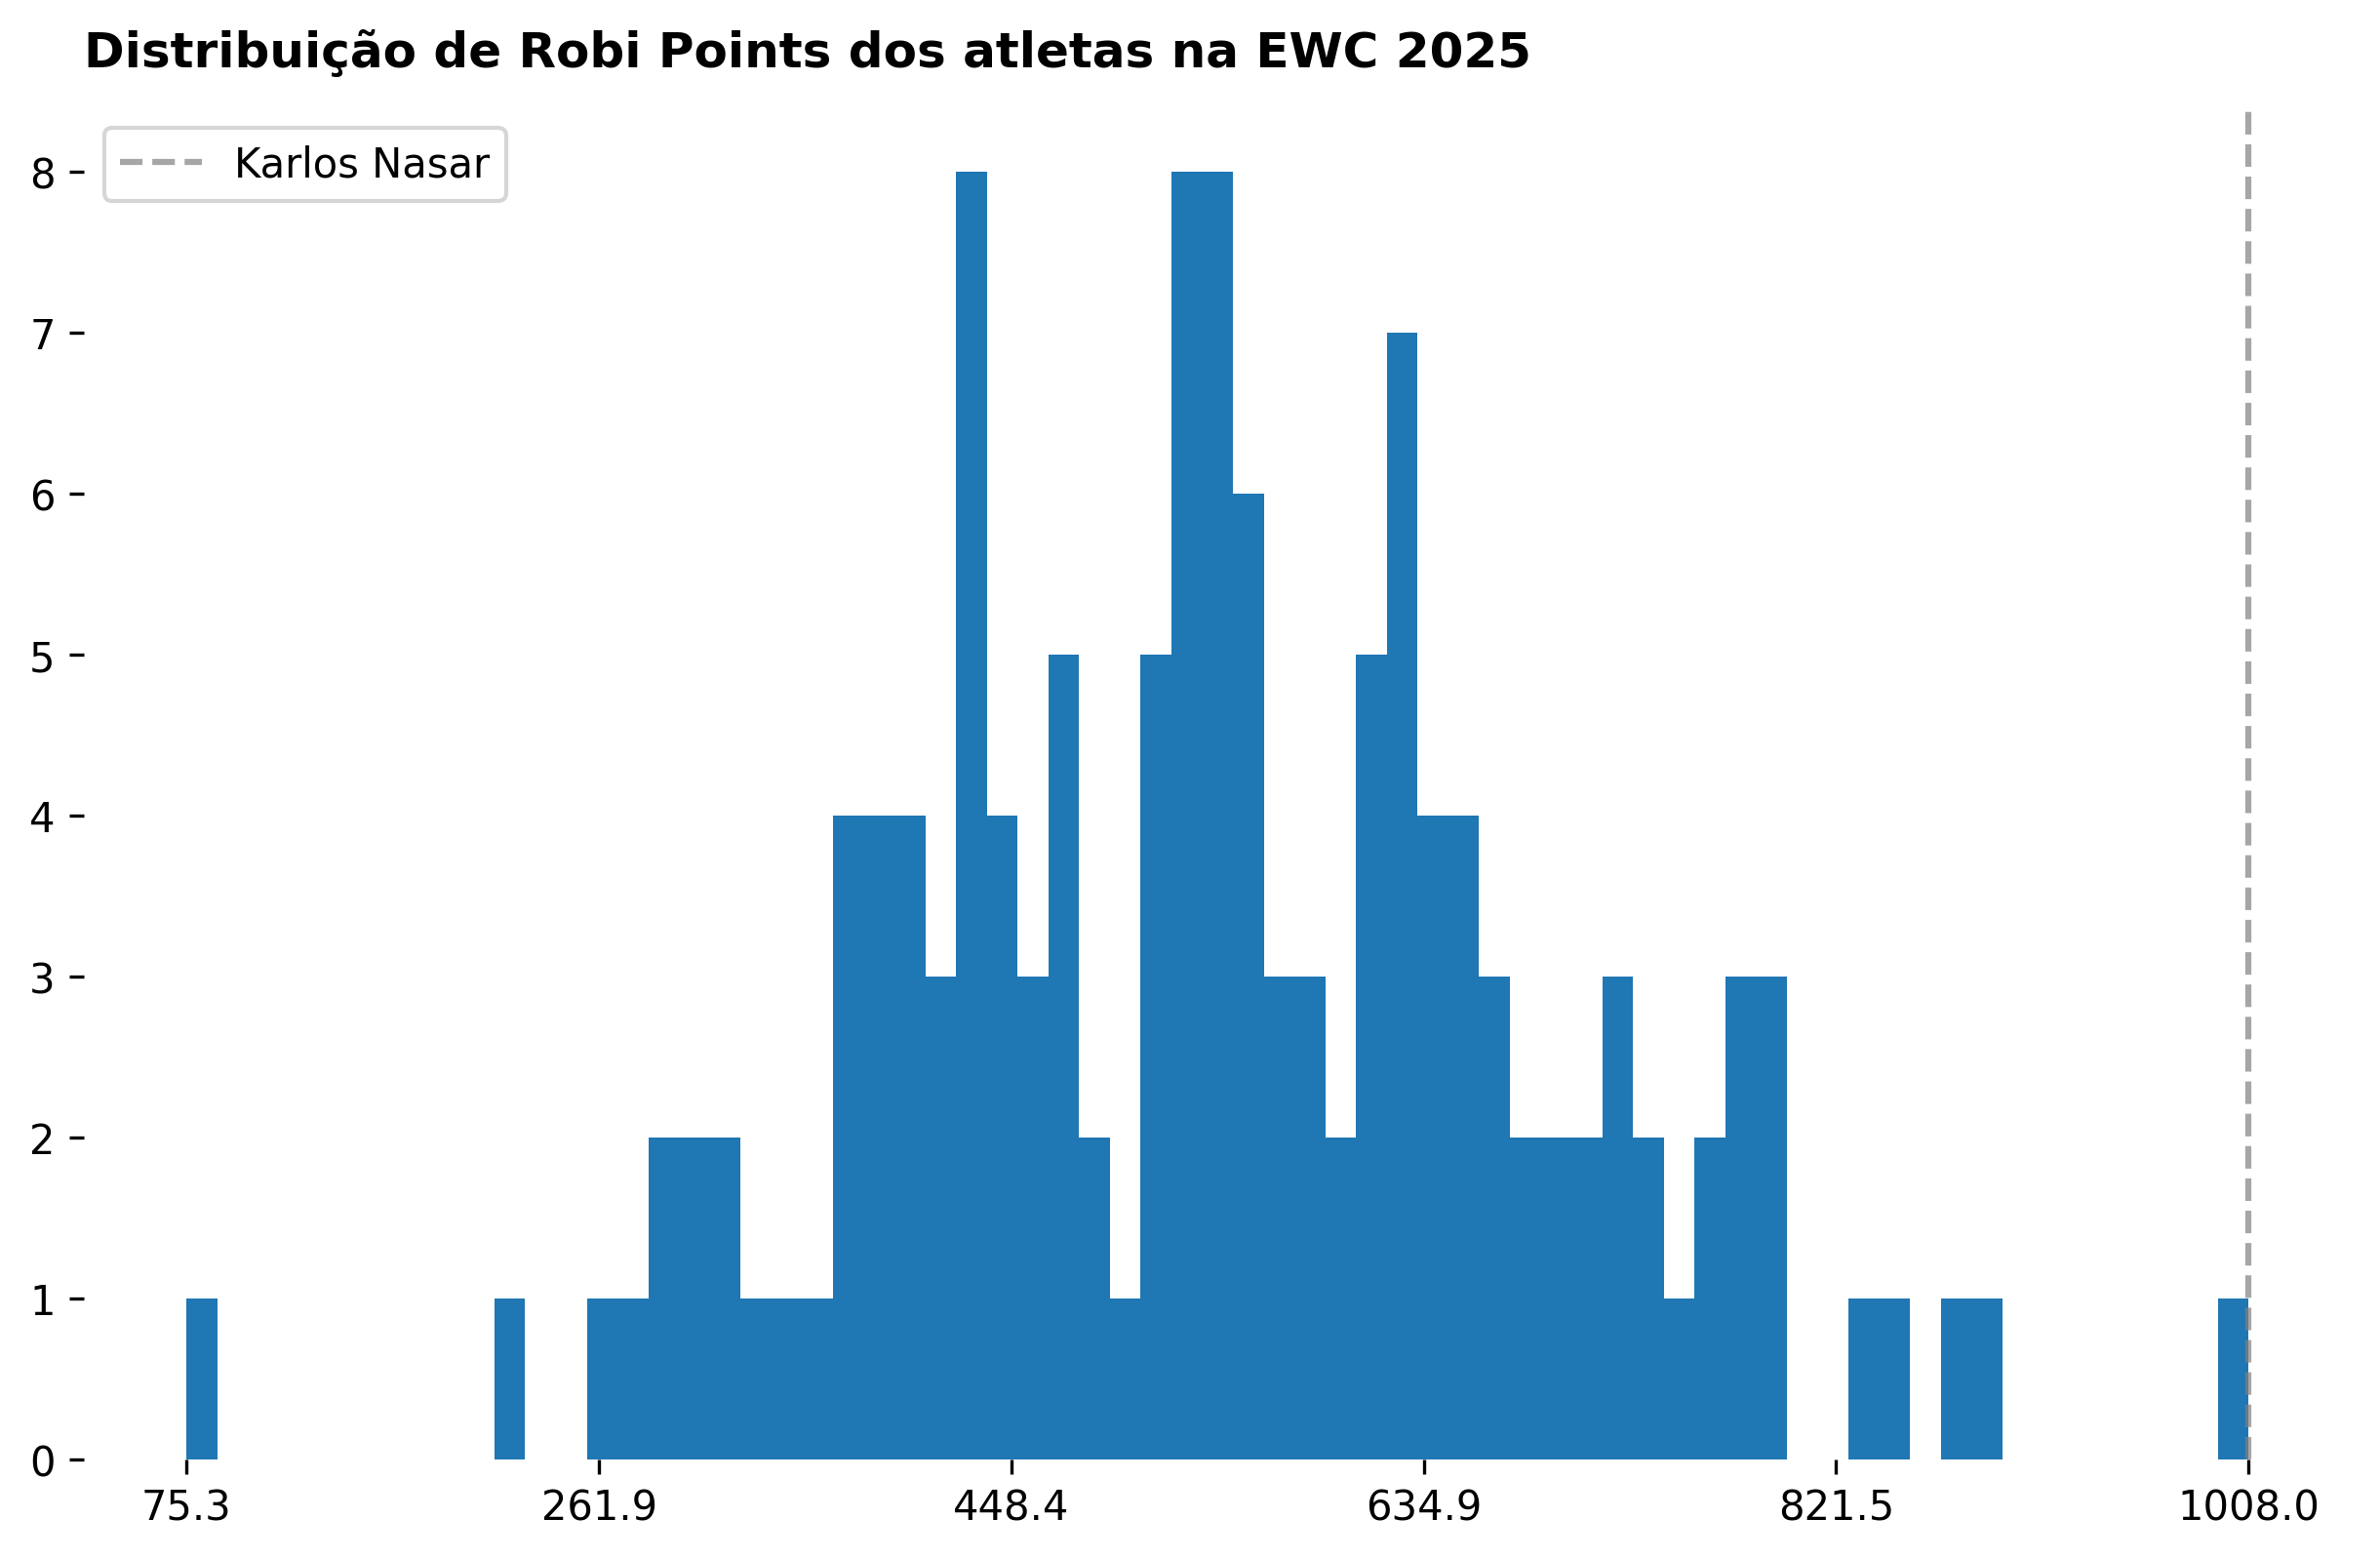

In [252]:
histogram(robi["Points"], "Distribuição de Robi Points dos atletas na EWC 2025", robi["Points"].max())

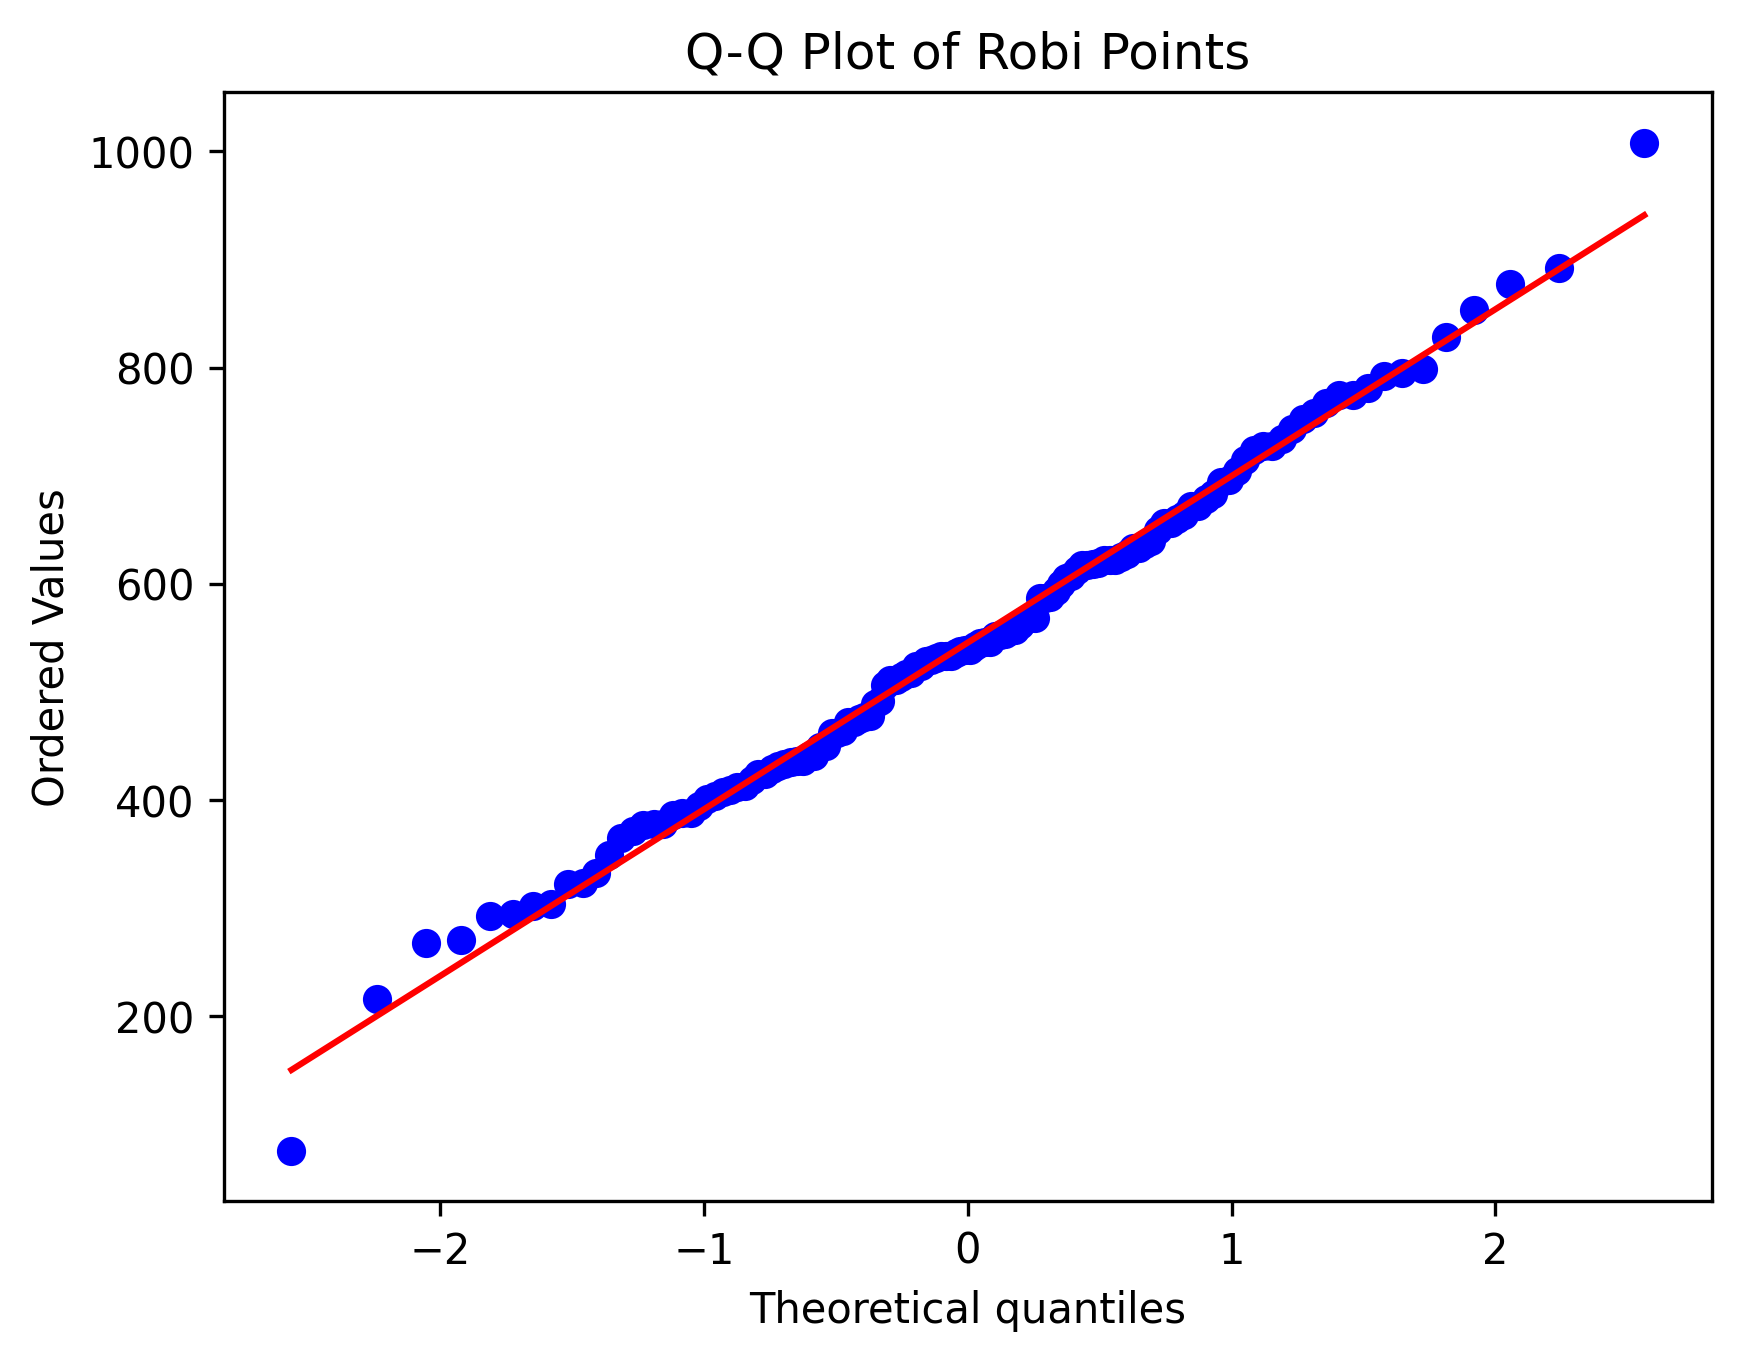

In [231]:
probplot(robi["Points"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Robi Points")
plt.show()

In [232]:
robi_dagostino_stat, robi_dagostino_pval = normaltest(robi["Points"])
if robi_dagostino_pval <= ALPHA:
    print(f"Robi points are most likely NOT normally distributed (reject H0 with pval {robi_dagostino_pval})")
else:
    print(f"Robi points are most likely normally distributed (do NOT reject H0 with pval {robi_dagostino_pval})")    

Robi points are most likely normally distributed (do NOT reject H0 with pval 0.6267069488585636)


In [233]:
sample = robi["Points"].to_numpy()
i = robi[robi["Name"].str.contains("NASAR")].index
x0 = sample[i]

mu = np.mean(sample)
sigma = np.std(sample, ddof=1)

z = ((x0 - mu) / sigma)[0]
p = 1 - norm.cdf(z)

print(f"Z = {z}, p = {p}")

if p <= ALPHA:
    print(f"The probability of observing the value is {p:.4f}, below alpha, reject H0")
else:
    print(f"The probability of observing the value is {p:.4f}, above alpha, do NOT reject H0")

Z = 3.0250591998703853, p = 0.0012429223272008016
The probability of observing the value is 0.0012, below alpha, reject H0


A z-test on the Robi distribution shows that Karlos' score is truly higher than the group, with a probability of ~0.0012 of observing such value on the higher end of this distribution

## Karlos vs -96s, -102s and -109s

In [234]:
all_totals = pd.concat([
    total,
    total_102,
    total_109
], axis=0)

all_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 16
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Standing      52 non-null     int64  
 1   Name          52 non-null     object 
 2   Born          52 non-null     object 
 3   Nation        52 non-null     object 
 4   Session       52 non-null     object 
 5   Bodyweight    52 non-null     float64
 6   Snatch        52 non-null     int64  
 7   CleanAndJerk  52 non-null     int64  
 8   Total         52 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 4.1+ KB


Since I will compare Karlos' result to the distribution I will remove all outliers, which are most likely competitors who couldn't post a total or DNF (did not finish)

{'whiskers': [<matplotlib.lines.Line2D at 0x140907310>,
 'caps': [<matplotlib.lines.Line2D at 0x140907130>,
 'boxes': [<matplotlib.lines.Line2D at 0x140906bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x140906fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x140905930>],
 'means': []}

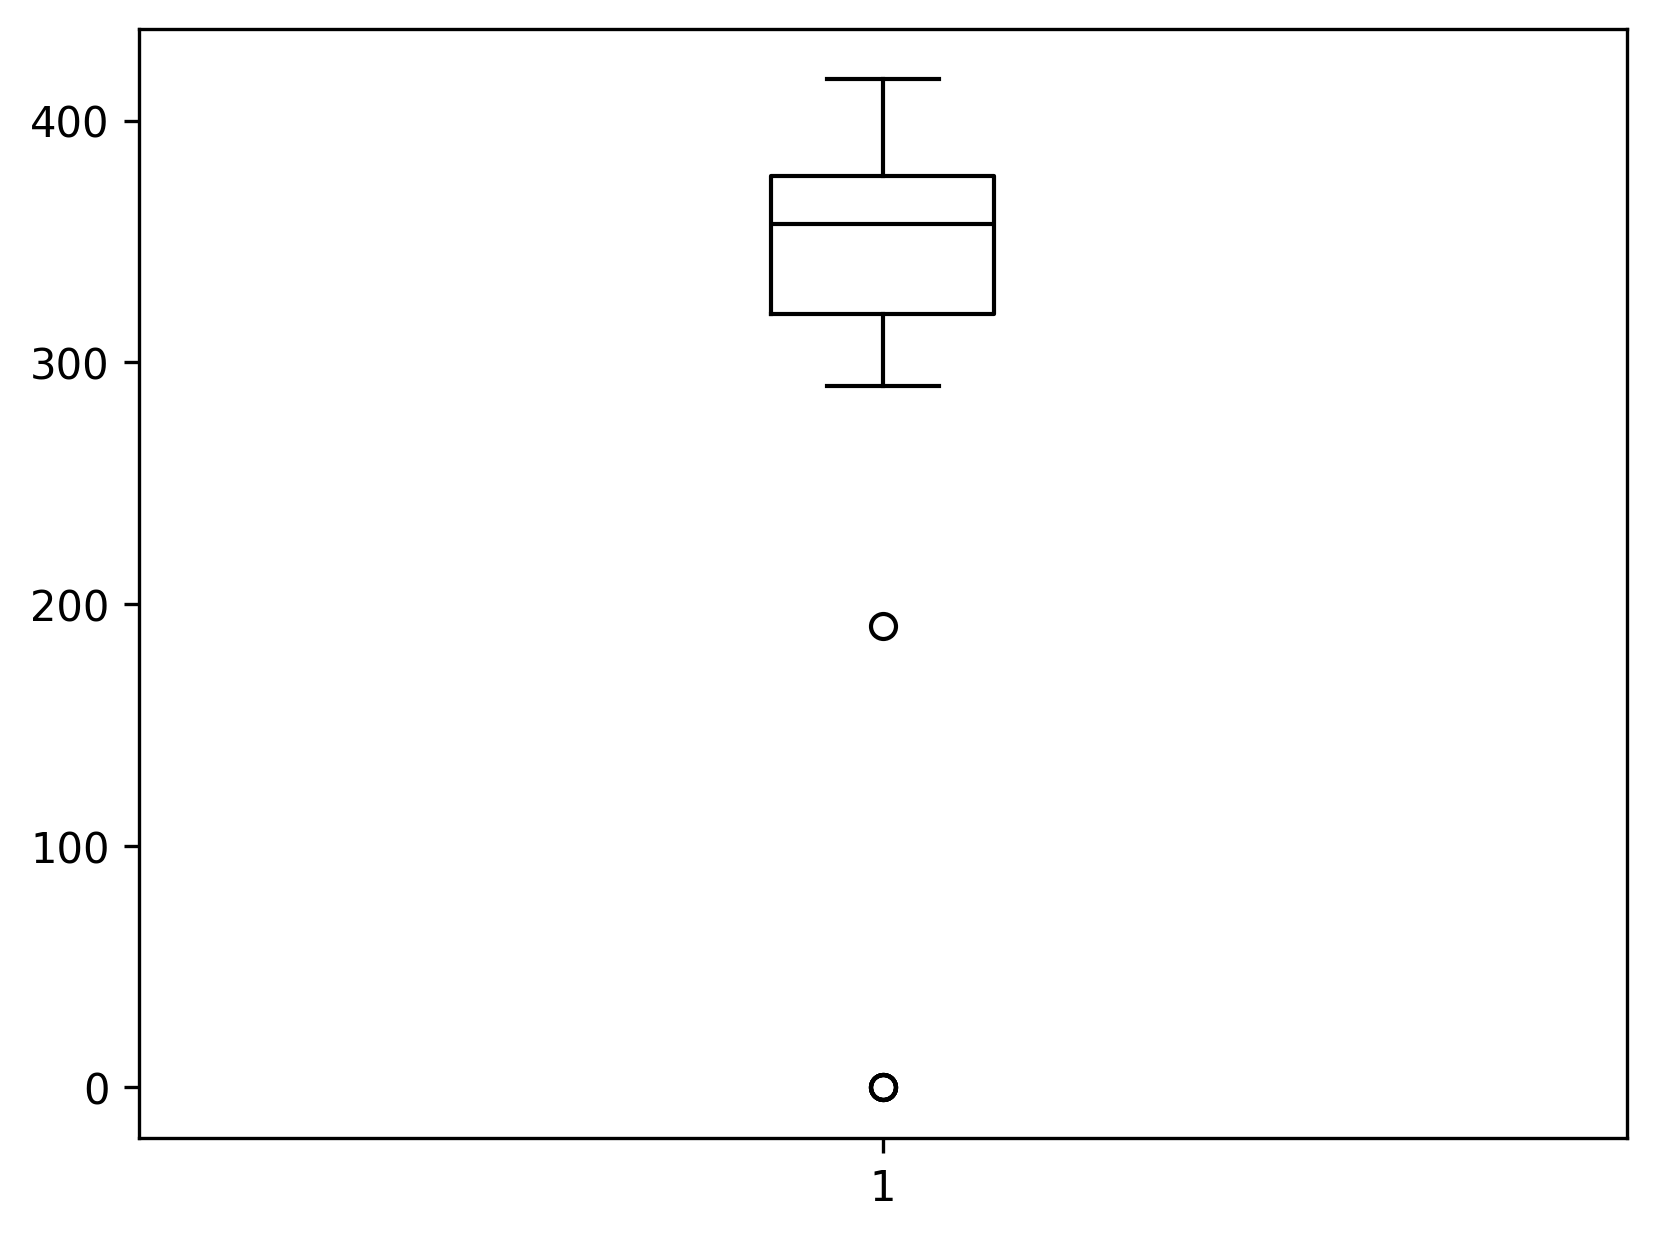

In [235]:
plt.boxplot(all_totals["Total"])

In [236]:
all_totals = all_totals[all_totals["Total"] > 200]

all_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Standing      46 non-null     int64  
 1   Name          46 non-null     object 
 2   Born          46 non-null     object 
 3   Nation        46 non-null     object 
 4   Session       46 non-null     object 
 5   Bodyweight    46 non-null     float64
 6   Snatch        46 non-null     int64  
 7   CleanAndJerk  46 non-null     int64  
 8   Total         46 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 3.6+ KB


In [237]:
all_totals.describe()

,Standing,Bodyweight,Snatch,CleanAndJerk,Total
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,8.304348,101.258478,159.326087,195.891304,355.217391
std,4.703992,5.771895,16.883989,16.511583,32.296483
min,1.000000,92.600000,125.000000,160.000000,290.000000
25%,4.250000,95.925000,147.000000,185.750000,325.000000
50%,8.000000,101.360000,162.500000,196.000000,360.000000
75%,12.000000,108.317500,172.750000,205.000000,378.500000
max,18.000000,109.000000,188.000000,229.000000,417.000000


/var/folders/jq/tdq0h8rj1zdbxsbs18vhfp0h0000gp/T/ipykernel_61212/2618457983.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nasar_total = float(all_totals[all_totals["Name"].str.contains("NASAR")]["Total"])


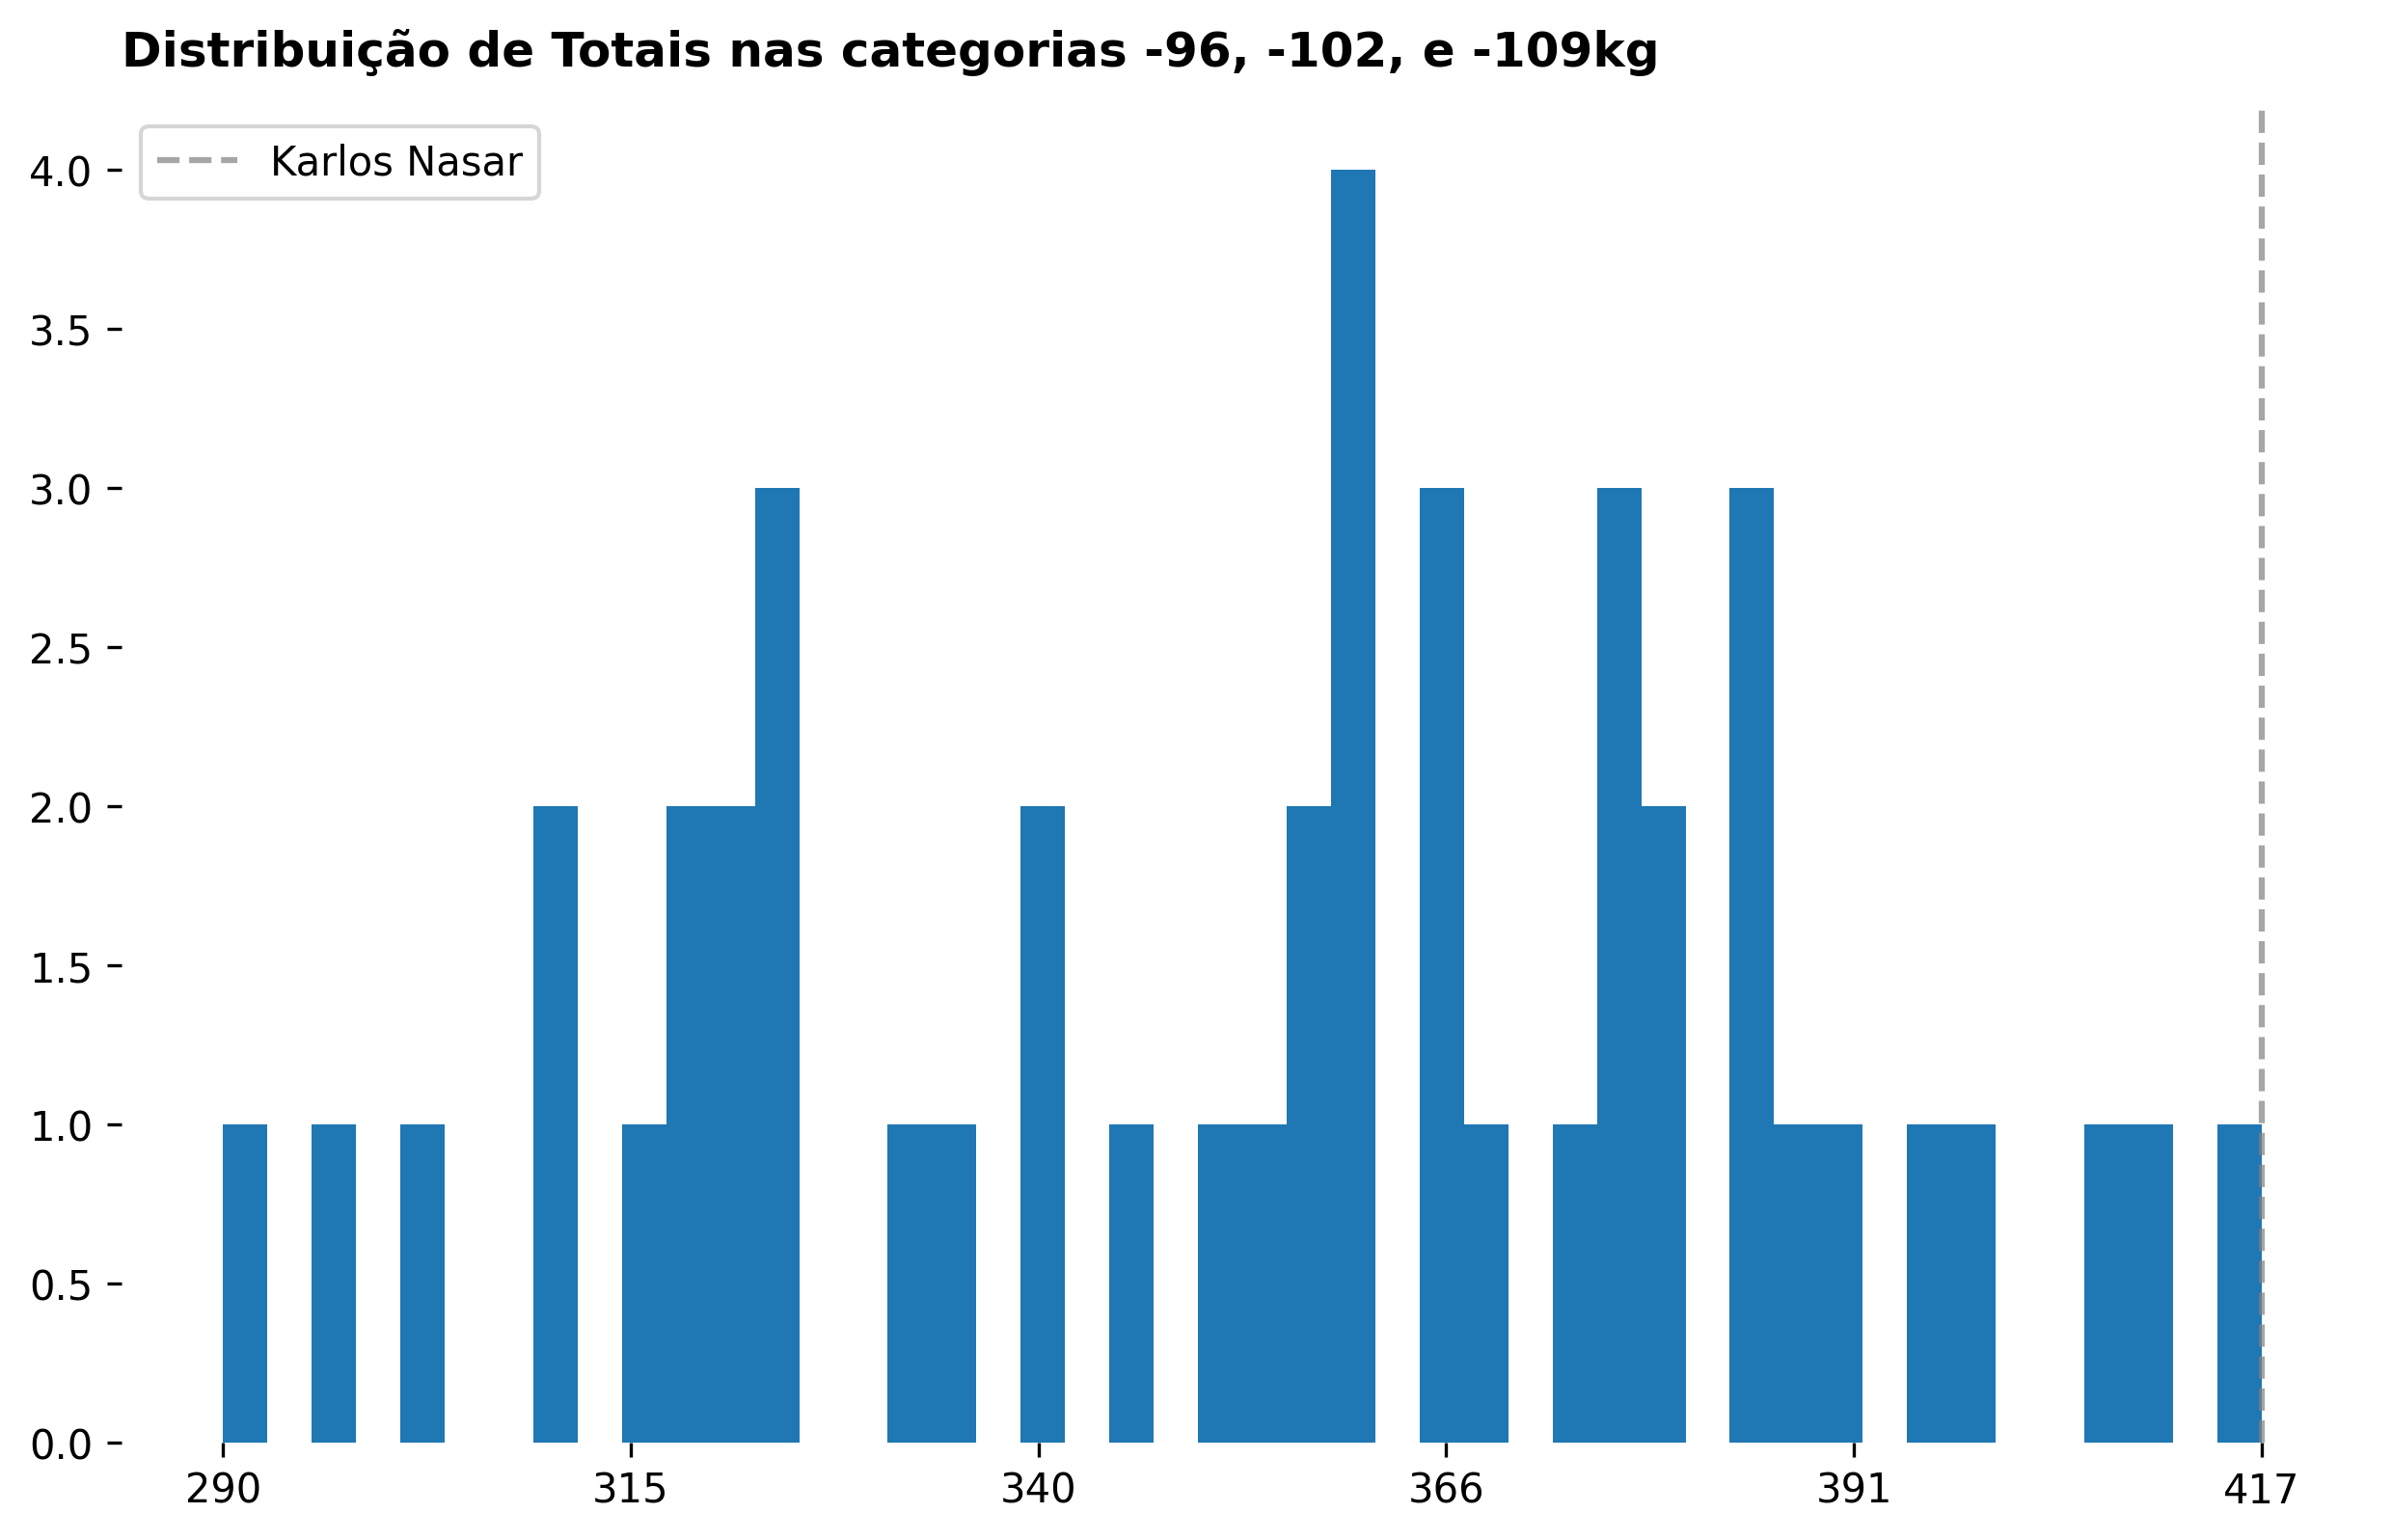

In [238]:
nasar_total = float(all_totals[all_totals["Name"].str.contains("NASAR")]["Total"])
histogram(all_totals["Total"], "Distribuição de Totais nas categorias -96, -102, e -109kg", vline_value=nasar_total)

In [239]:
all_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Standing      46 non-null     int64  
 1   Name          46 non-null     object 
 2   Born          46 non-null     object 
 3   Nation        46 non-null     object 
 4   Session       46 non-null     object 
 5   Bodyweight    46 non-null     float64
 6   Snatch        46 non-null     int64  
 7   CleanAndJerk  46 non-null     int64  
 8   Total         46 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 3.6+ KB


In [240]:
all_totals = all_totals.sort_values(by="Total", ascending=False)
all_totals.head()

,Standing,Name,Born,Nation,Session,Bodyweight,Snatch,CleanAndJerk,Total
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,188,229,417
0,1,KARAPETYAN Garik,11.06.2003,ARM,A,108.08,185,226,411
1,2,MARTIROSYAN Simon,17.02.1997,ARM,A,109.00,181,225,406
0,1,TSIKHANTSOU Yauheni,04.11.1998,AIN,A,101.30,181,218,399
1,2,RUIZ I VELASCO Marcos,13.10.1996,ESP,A,102.00,180,217,397


In [241]:
all_totals.sort_values(by="Bodyweight", ascending=True).head()

,Standing,Name,Born,Nation,Session,Bodyweight,Snatch,CleanAndJerk,Total
7,8,SIMBUERGER Elias,28.03.2004,AUT,B,92.60,147,189,336
0,1,NASAR Karlos May,12.06.2004,BUL,A,93.35,188,229,417
17,18,DOBNIK Peter,08.07.1991,SLO,B,93.50,130,160,290
1,2,DAVITADZE Revaz,16.10.1998,GEO,A,94.75,174,205,379
9,10,TATARU Darius Stefan,19.12.2004,ROU,B,94.90,135,190,325


/var/folders/jq/tdq0h8rj1zdbxsbs18vhfp0h0000gp/T/ipykernel_61212/4187891222.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nasar_bw = float(all_totals[all_totals["Name"].str.contains("NASAR")]["Bodyweight"])


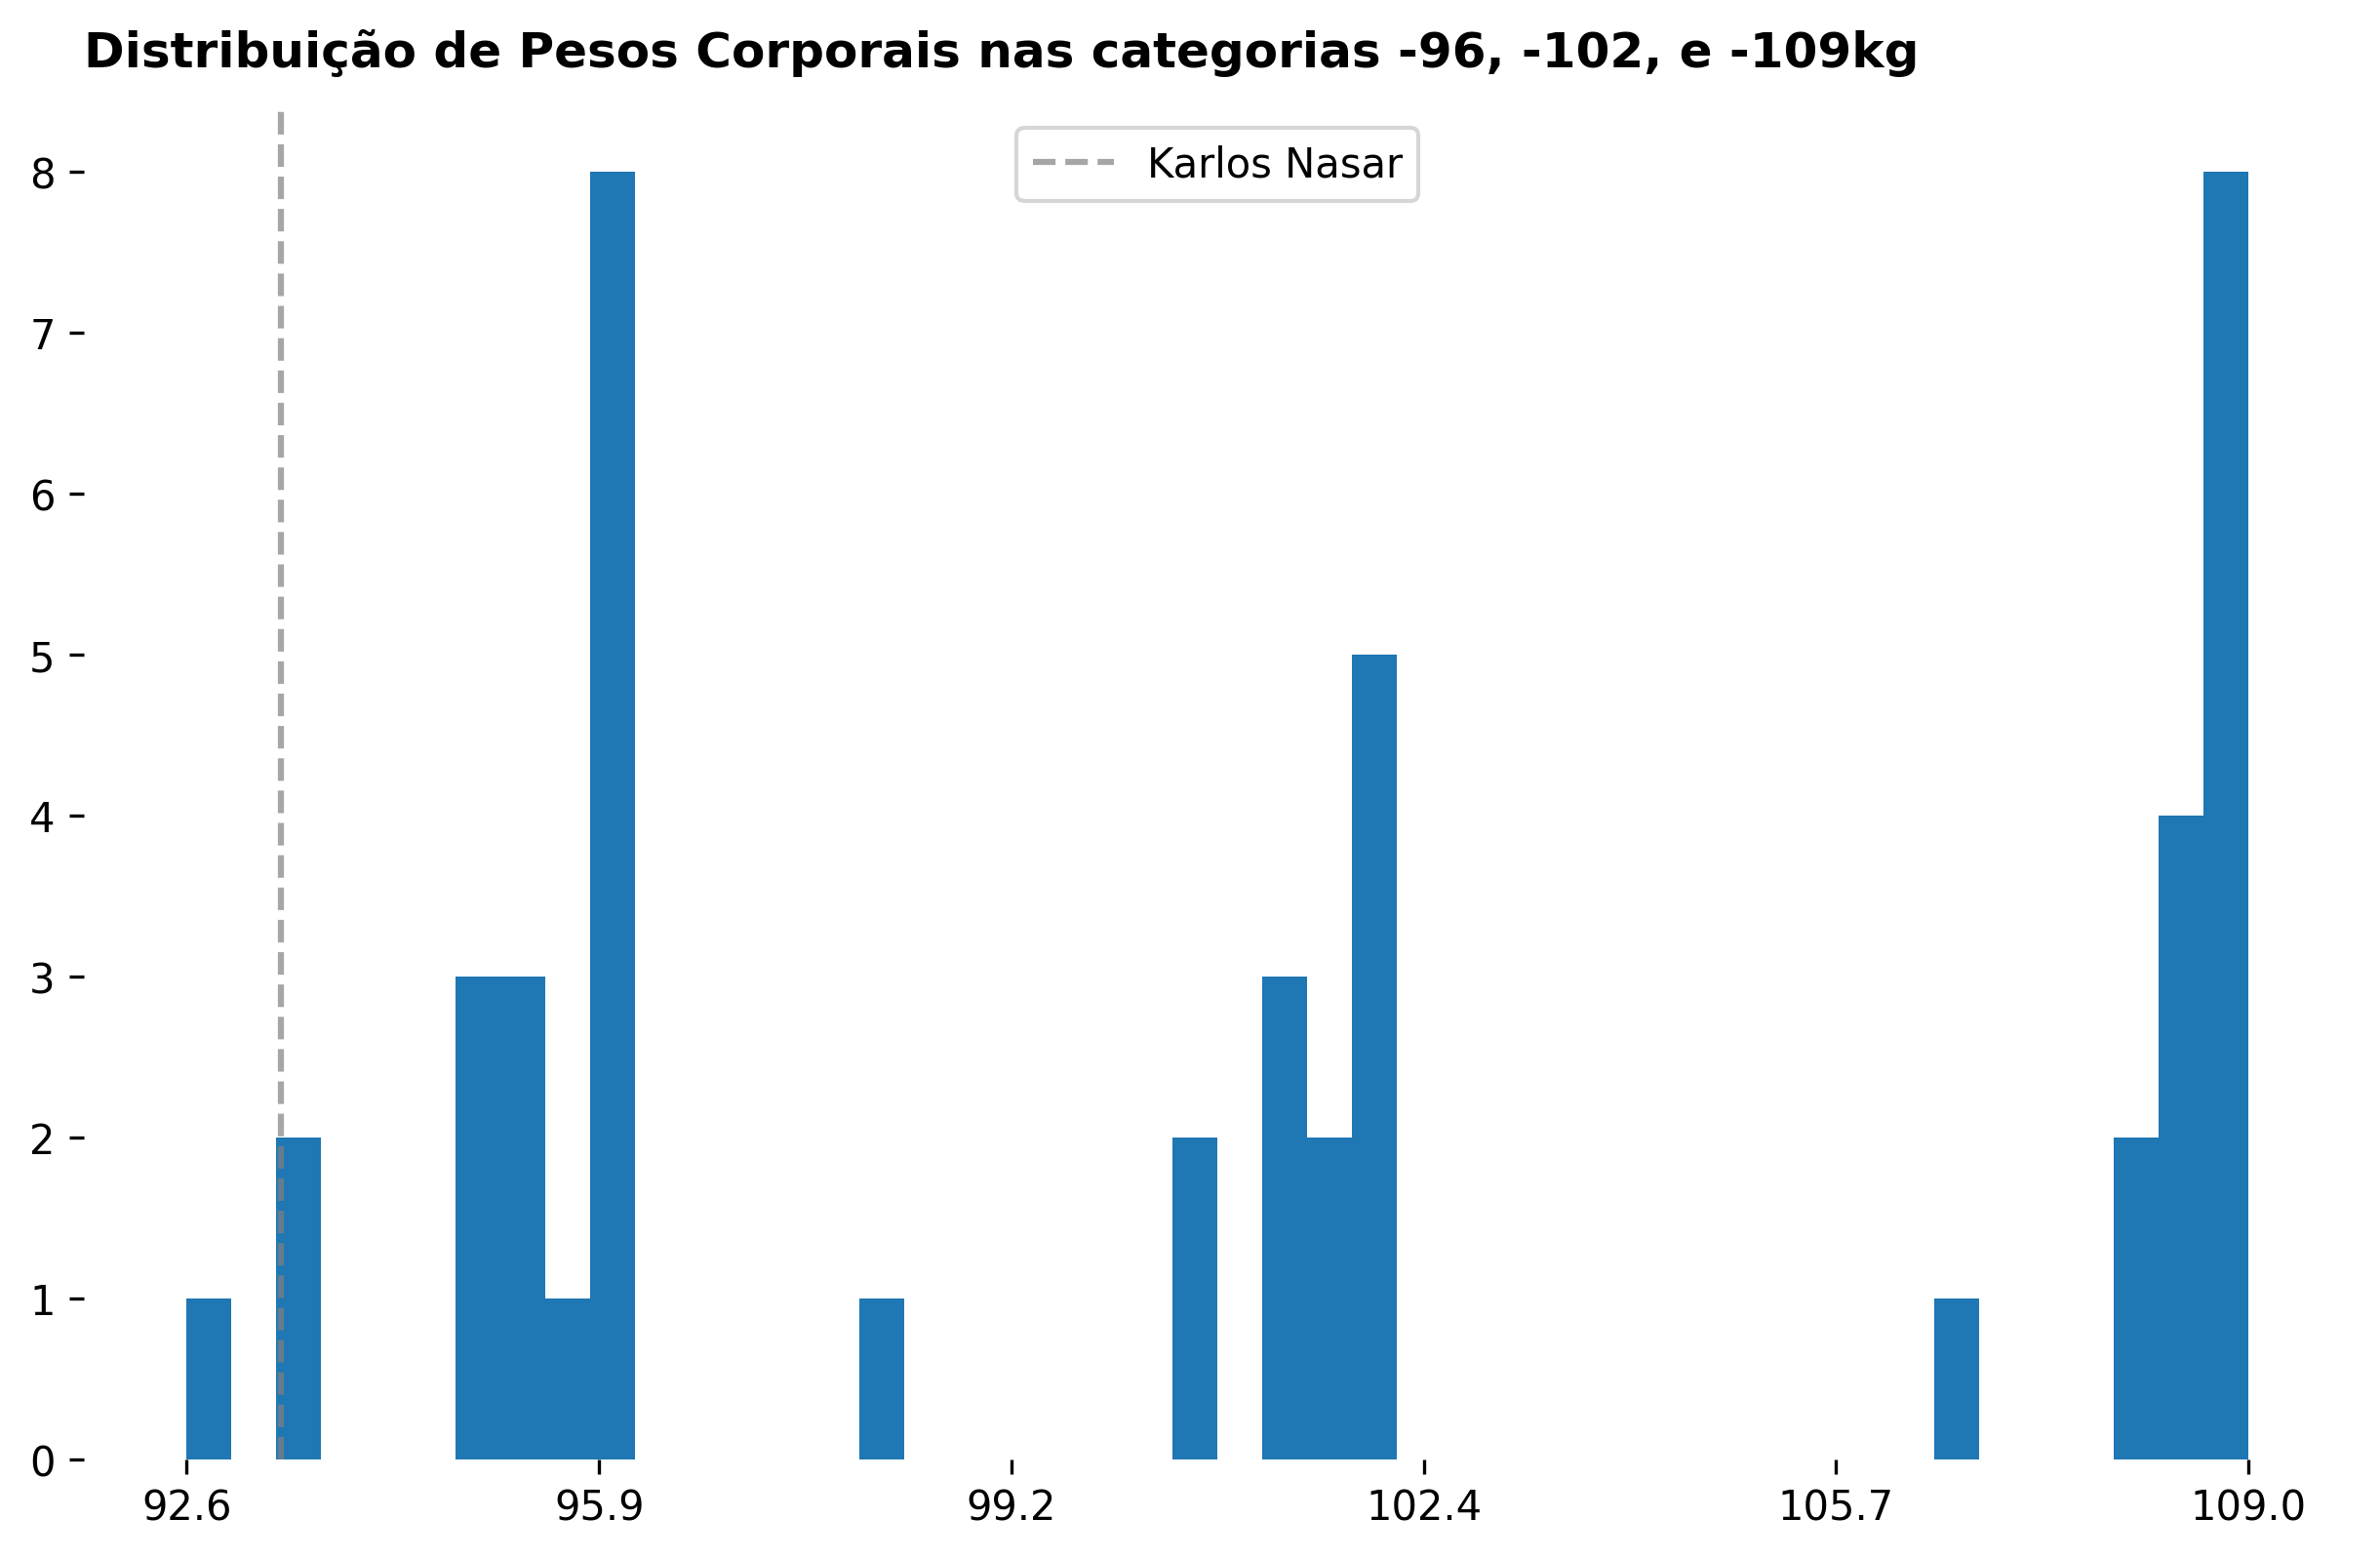

In [242]:
nasar_bw = float(all_totals[all_totals["Name"].str.contains("NASAR")]["Bodyweight"])
histogram(all_totals["Bodyweight"], "Distribuição de Pesos Corporais nas categorias -96, -102, e -109kg", vline_value=nasar_bw)

Karlos Nasar managed to total more than all 96s, 102s and 109s, while being the second lightest athlete of all these sessions. The current world record for the 102 class is 413kg by Liu Huanhua, meaning this performance by Karlos would have set a new record in the weight class above, while fitting the bodyweight for the 96s

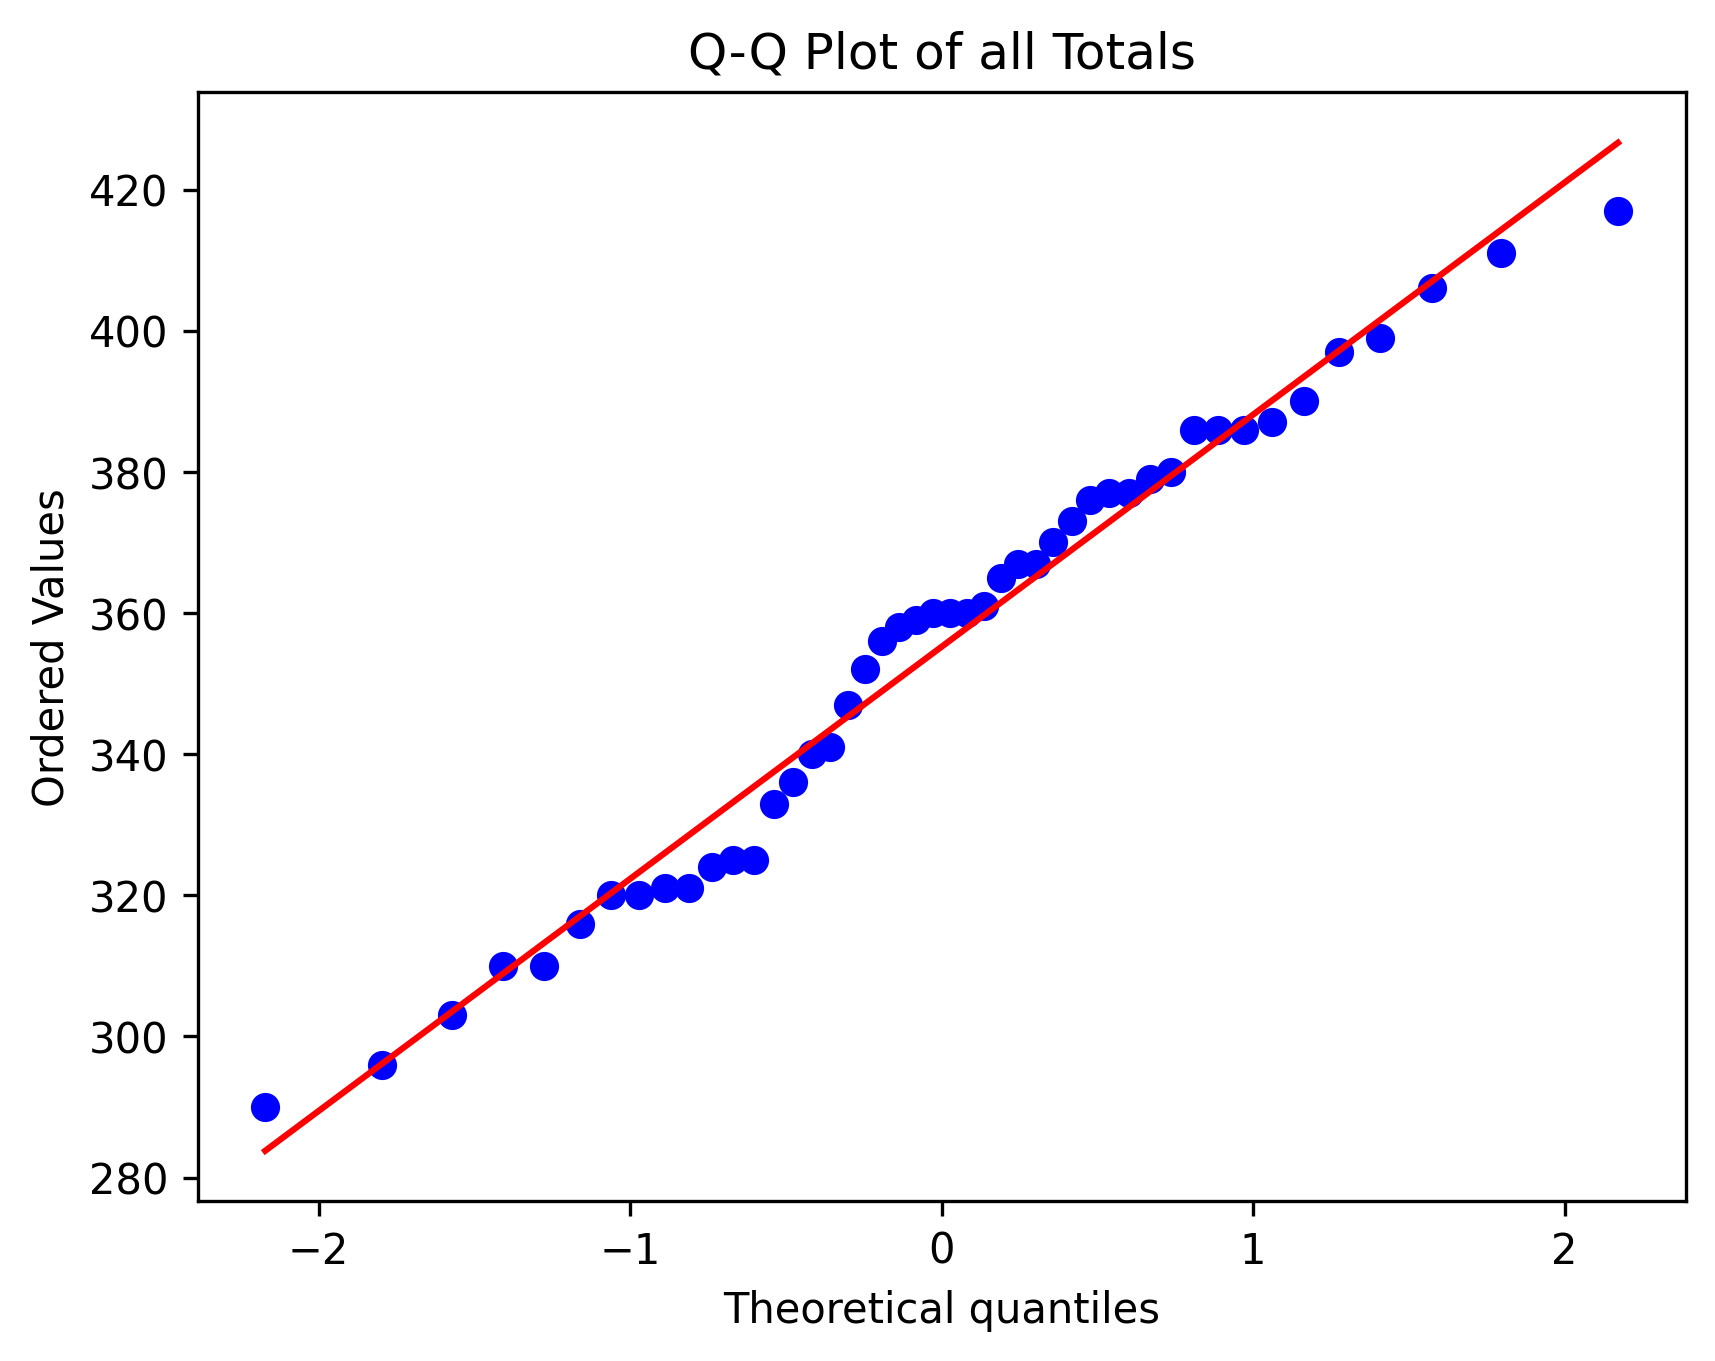

In [243]:
probplot(all_totals["Total"], dist="norm", plot=plt)
plt.title("Q-Q Plot of all Totals")
plt.show()

In [244]:
totals_shapiro_stat, totals_shapiro_pval = shapiro(all_totals["Total"])

if totals_shapiro_pval <= ALPHA:
    print(f"Totals are most likely NOT normally distributed (reject H0 with pval {totals_shapiro_pval})")
else:
    print(f"Totals are most likely normally distributed (do NOT reject H0 with pval {totals_shapiro_pval})")    

Totals are most likely normally distributed (do NOT reject H0 with pval 0.36410520752095327)


In [245]:
sample = all_totals["Total"].to_numpy()
i = all_totals[all_totals["Name"].str.contains("NASAR")].index
x0 = sample[i]

mu = np.mean(sample)
sigma = np.std(sample, ddof=1)

z = ((x0 - mu) / sigma)[0]
p = 1 - norm.cdf(z)

print(f"Z = {z}, p = {p}")

if p <= ALPHA:
    print(f"The probability of observing the value is {p:.4f}, below alpha, reject H0")
else:
    print(f"The probability of observing the value is {p:.4f}, above alpha, do NOT reject H0")

Z = 1.912982570209281, p = 0.027875141917534263
The probability of observing the value is 0.0279, below alpha, reject H0


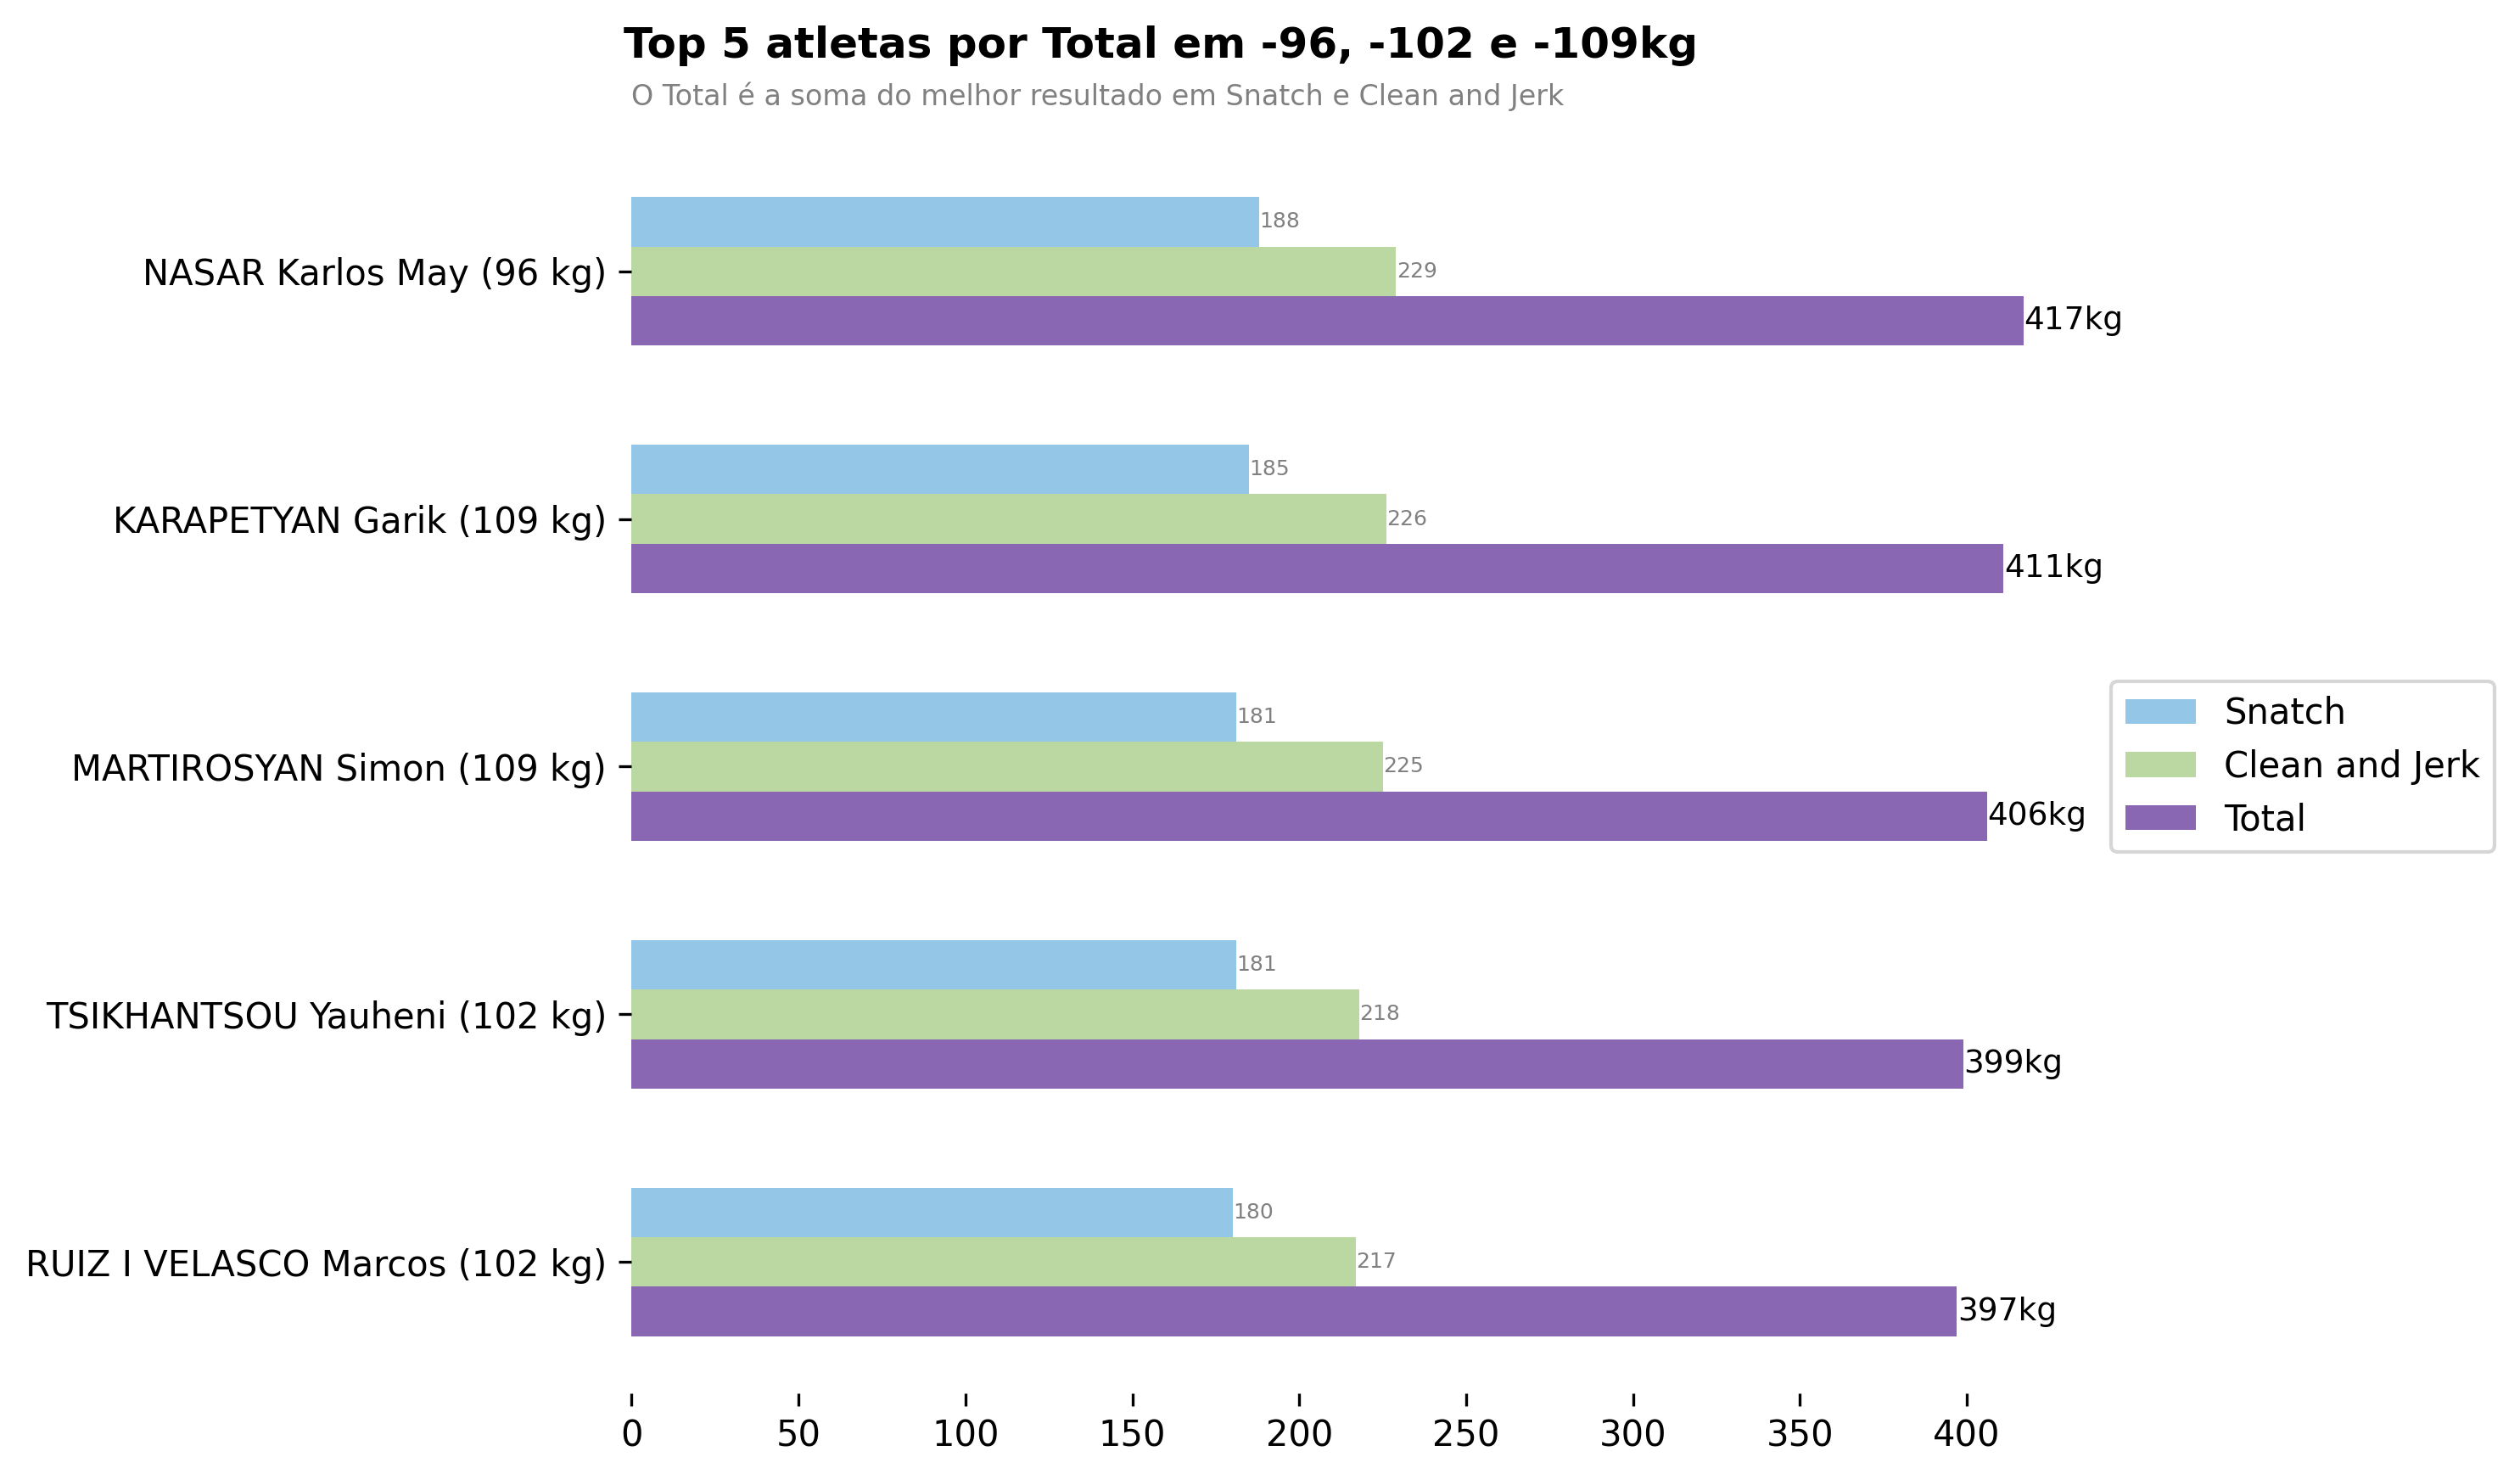

In [250]:
names_categories = robi[["Name", "Category"]]

top5_all_totals = all_totals.iloc[:5]

top5_all_totals = pd.merge(top5_all_totals, names_categories, how="left", on="Name")

top5_all_totals.head()

top5_all_totals["Name"] = top5_all_totals.apply(lambda row: f"{row['Name']} ({row['Category']})", axis=1)
plot_total_info(top5_all_totals, (0.25, 0.96), "-96, -102 e -109kg")

In [251]:
top5_all_totals.iloc[1]["Bodyweight"] - top5_all_totals.iloc[0]["Bodyweight"]

14.730000000000004

## Robi x Total

In [247]:
categories = robi["Category"]
categories

0        96 kg
1       102 kg
2       102 kg
3        73 kg
4       109 kg
        ...   
129    +109 kg
130    +109 kg
131    +109 kg
132    +109 kg
133      96 kg
Name: Category, Length: 134, dtype: object

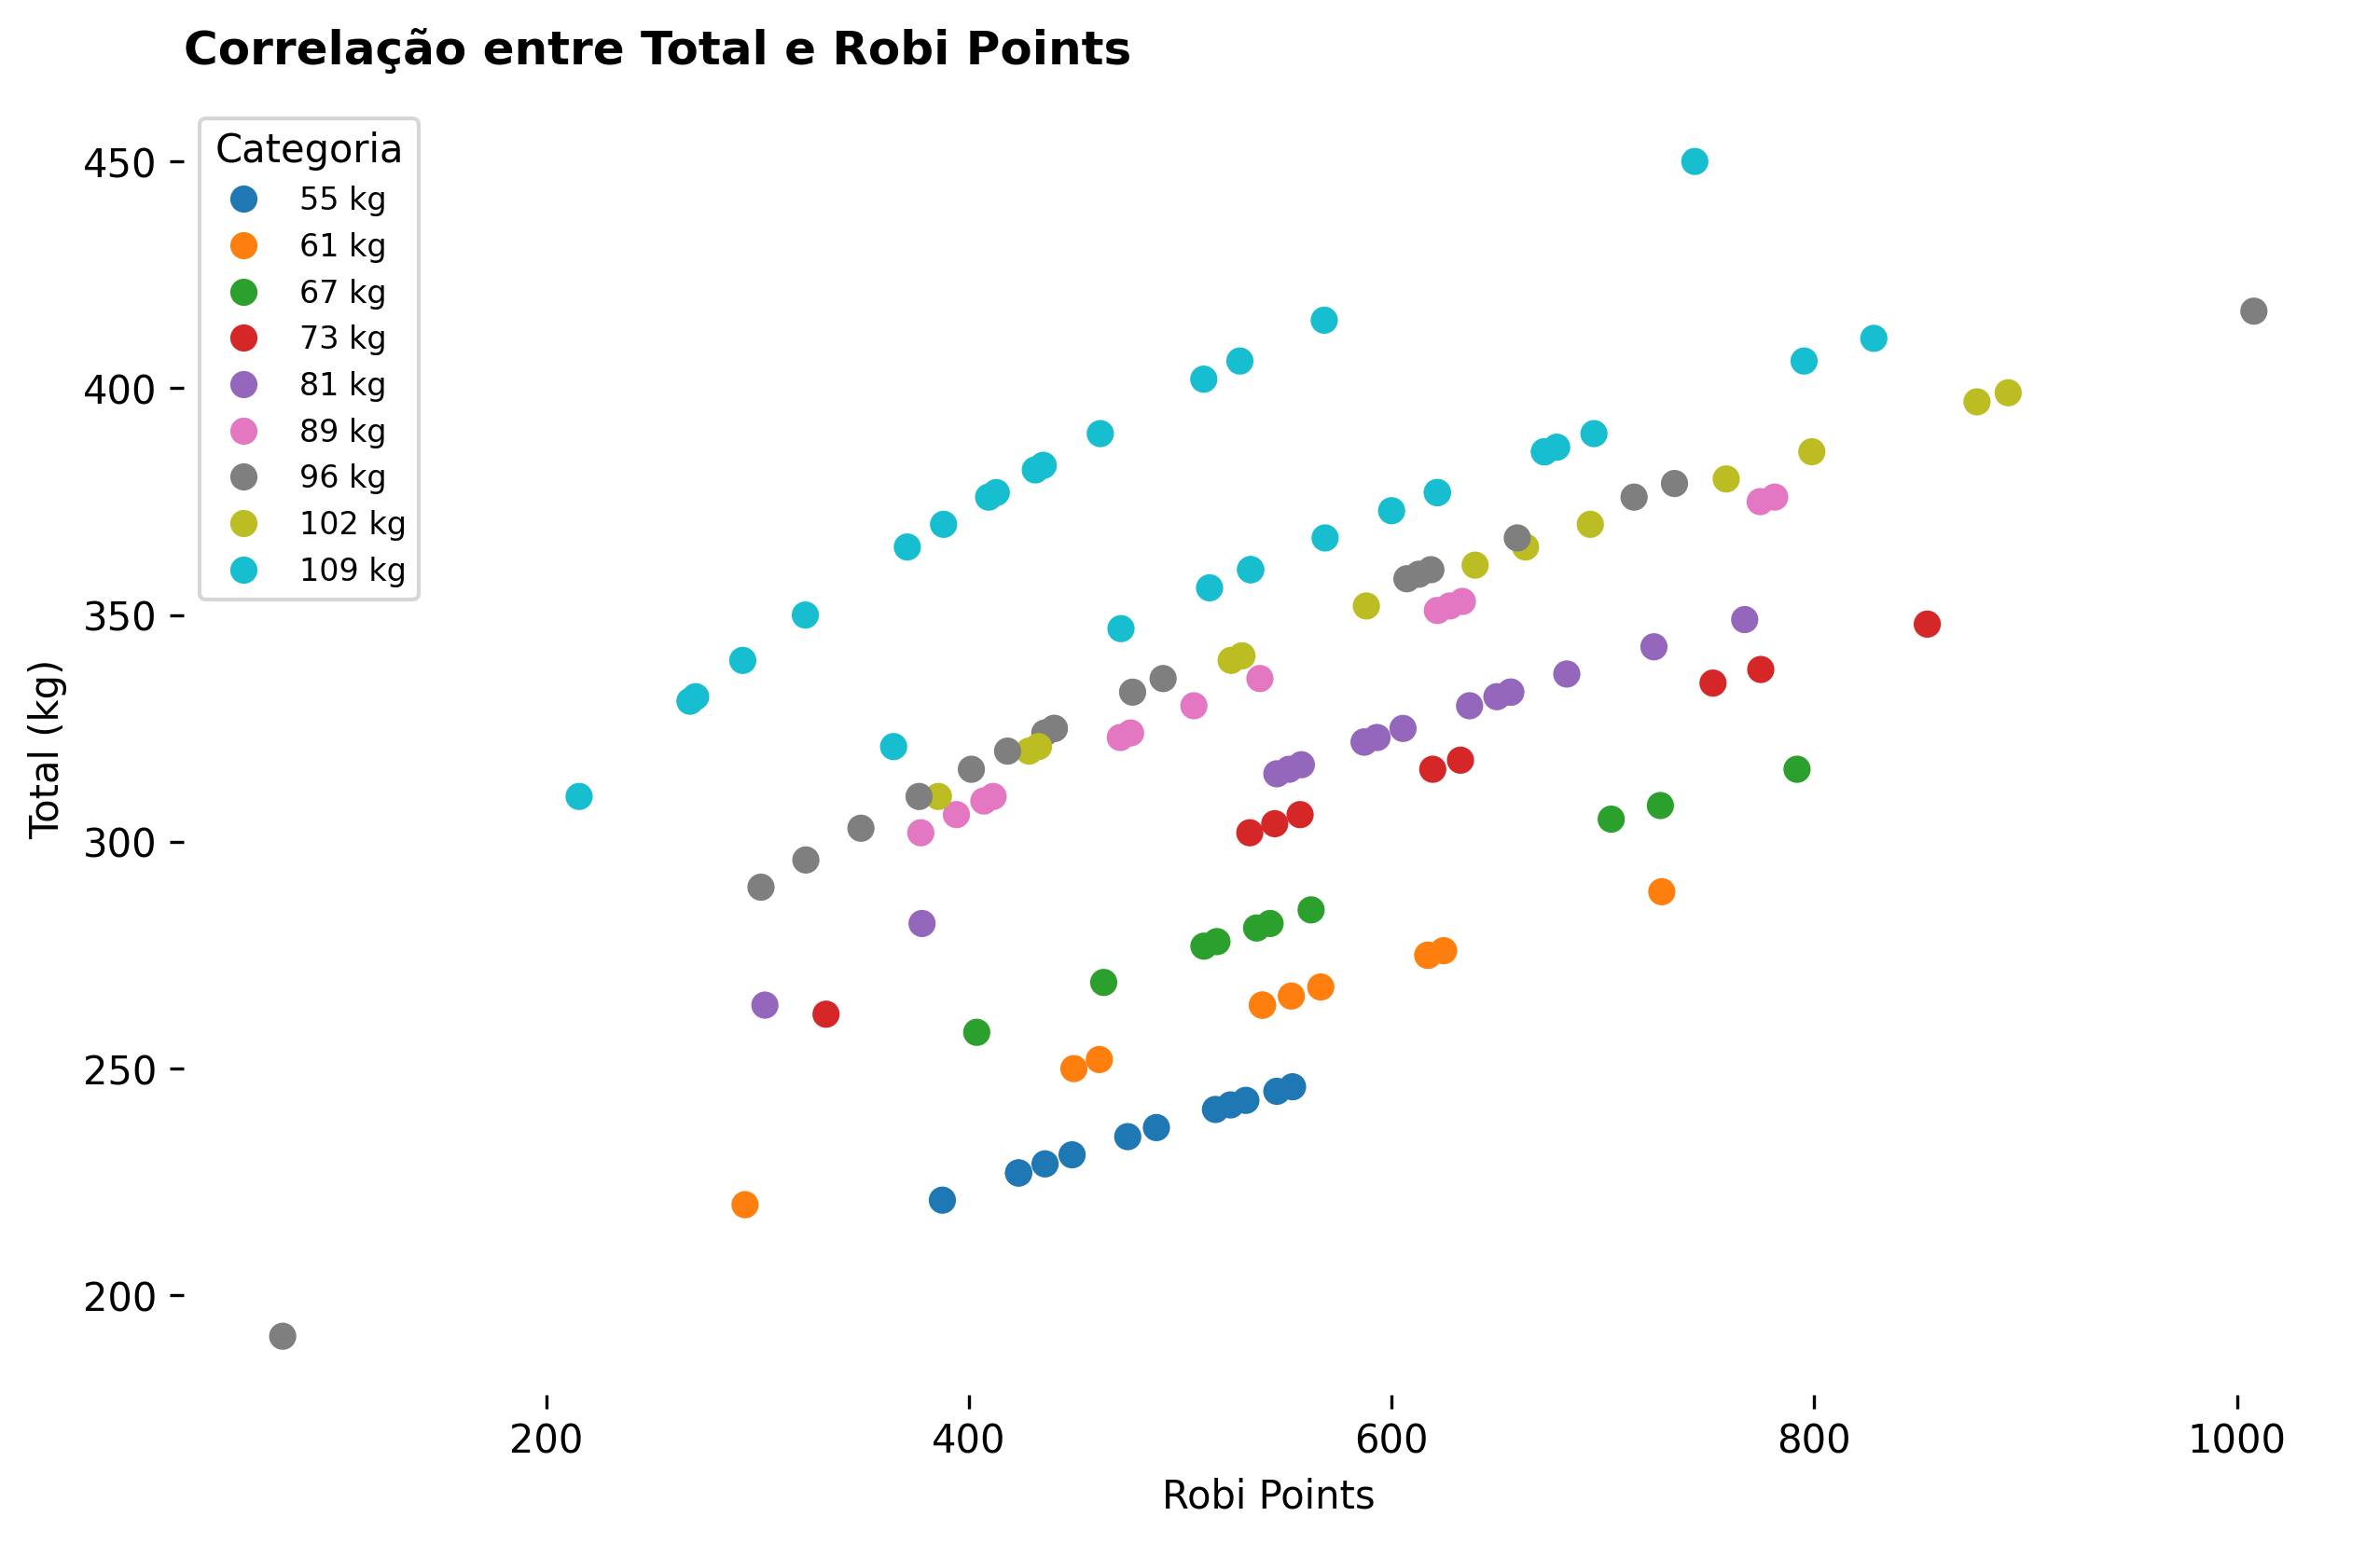

In [ ]:
# TODO FIX THIS
category_numbers = np.array([int(cat.split()[0]) for cat in categories])

# Sort unique categories by the numeric value
sorted_categories = sorted(set(category_numbers))

# Map sorted categories back to strings for the legend
category_strings = [f'{cat} kg' for cat in sorted_categories]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

scatter = ax.scatter(robi["Points"], robi["AthleteTotal"], c=category_numbers, cmap="tab10")

handles = [plt.Line2D([], [], marker='o', linestyle='', color=scatter.cmap(scatter.norm(cat)), label=f'{cat} kg')
           for cat in sorted_categories]
ax.legend(handles=handles, title='Categoria', fontsize=8)

ax.set_ylabel("Total (kg)")
ax.set_xlabel("Robi Points")

plt.title(
    f"Correlação entre Total e Robi Points",
    fontsize=12,
    fontweight="bold",
    pad=10,
    loc="left"
)

plt.show()

In [249]:
pearson_stat, pearson_pval = pearsonr(robi["Points"], robi["AthleteTotal"])

if pearson_pval <= ALPHA:
    print(f"Evidence points to a significant correlation of {pearson_stat:.4f} with p-value {pearson_pval:.4f}")
else:
    print(f"Evidence does NOT point to a significant correlation of {pearson_stat:.4f} with p-value {pearson_pval:.4f}")

Evidence points to a significant correlation of 0.4966 with p-value 0.0000


There seems to be a moderate significant correlation between the total and the Robi Points of an athlete. There also seems to be a clear division on total for each category, which makes sense, while this division does not occur so obviously on the Robi Points axis, which also makes sense since the scoring system was created to easily compare athletes between different weight classes